#Airbnb Price Prediction
*   MSCA 31008 1 Data Mining Principles
*   Group 7: Ali Ahmad, Jiayi Du, Lincy Qin, Sarder Haider Waseem, Samantha Wang





## Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



## Loading libraries and data

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

### Listings

In [ ]:
#Before loading data, the data folder in shared drive needed to be added to your drive as a shortcut
filepath = '/content/drive/My Drive/Data151221/'
df_listings = pd.read_csv(filepath + 'listings_gz.csv')

In [ ]:
# Calculate the null value of each feature
def get_nulls_unique(df):
  nulls = []
  unique = []
  for col in df.columns:
    nulls.append(df[col].isna().sum()/df.shape[0])
    unique.append(len(df[col].unique())/df.shape[0])
  return pd.DataFrame({'Columns': df.columns, 'Nulls': nulls, 'Unique': unique})

In [ ]:
get_nulls_unique(df_listings).round(4)

,Columns,Nulls,Unique
0,id,0.0000,1.0000
1,listing_url,0.0000,1.0000
2,scrape_id,0.0000,0.0002
3,last_scraped,0.0000,0.0003
4,name,0.0000,0.9752
5,description,0.0028,0.9245
6,neighborhood_overview,0.2787,0.5125
7,picture_url,0.0000,0.9630
8,host_id,0.0000,0.5115
9,host_url,0.0000,0.5115


In [ ]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2384,https://www.airbnb.com/rooms/2384,20211215062239,2021-12-15,Hyde Park - Walk to University of Chicago,If you have proof of vaccination and can clim...,The apartment is less than one block from beau...,https://a0.muscache.com/pictures/9780bb37-fb54...,2613,https://www.airbnb.com/users/show/2613,Rebecca,2008-08-29,"Chicago, Illinois, United States",My 2 bdrm apartment is a 2nd floor walk-up in ...,within an hour,100%,84%,t,https://a0.muscache.com/im/pictures/user/8bb47...,https://a0.muscache.com/im/pictures/user/8bb47...,Hyde Park,1.0,1.0,"['email', 'phone', 'reviews', 'manual_offline'...",t,t,"Chicago, Illinois, United States",Hyde Park,NaN,41.78790,-87.58780,Private room in condominium (condo),Private room,1,NaN,1 shared bath,1.0,1.0,"[""Shampoo"", ""Cooking basics"", ""Hot water"", ""Ir...",$95.00,3,89,3,3,1125,1125,3.0,1125.0,NaN,t,27,57,87,355,2021-12-15,192,11,0,2015-01-09,2021-11-07,4.99,4.98,4.99,4.98,4.98,4.95,4.94,R17000015609,f,1,0,1,0,2.27
1,7126,https://www.airbnb.com/rooms/7126,20211215062239,2021-12-15,Tiny Studio Apartment 94 Walk Score,A very small studio in a wonderful neighborhoo...,"Ukrainian Village was just named ""Hottest Neig...",https://a0.muscache.com/pictures/51073/16c81c7...,17928,https://www.airbnb.com/users/show/17928,Sarah,2009-05-19,"Chicago, Illinois, United States",We live in Chicago. We love to travel and see ...,within an hour,100%,97%,t,https://a0.muscache.com/im/users/17928/profile...,https://a0.muscache.com/im/users/17928/profile...,Ukrainian Village,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Chicago, Illinois, United States",West Town,NaN,41.90166,-87.68021,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Stove"", ""Cooking basics"", ""Hot water"", ""Iron...",$65.00,2,60,2,2,1125,1125,2.0,1125.0,NaN,t,2,2,2,165,2021-12-15,425,38,3,2009-07-03,2021-11-28,4.67,4.83,4.54,4.90,4.86,4.87,4.73,R18000034991,f,1,1,0,0,2.80
2,10945,https://www.airbnb.com/rooms/10945,20211215062239,2021-12-15,The Biddle House (#1),Beautiful first floor apartment in Historic Ol...,NaN,https://a0.muscache.com/pictures/58d1a420-a24b...,33004,https://www.airbnb.com/users/show/33004,At Home Inn,2009-08-21,"Chicago, Illinois, United States","Hi, we're Bob and Liz Biddle, long time Chicag...",within an hour,94%,94%,t,https://a0.muscache.com/im/pictures/user/e23d4...,https://a0.muscache.com/im/pictures/user/e23d4...,Old Town,7.0,7.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,Lincoln Park,NaN,41.91196,-87.63981,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Shampoo"", ""Cable TV"", ""Stove"", ""Cooking basi...",$127.00,4,180,4,4,180,180,4.0,180.0,NaN,t,5,5,8,98,202

In [ ]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6544 entries, 0 to 6543
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6544 non-null   int64  
 1   listing_url                                   6544 non-null   object 
 2   scrape_id                                     6544 non-null   int64  
 3   last_scraped                                  6544 non-null   object 
 4   name                                          6544 non-null   object 
 5   description                                   6526 non-null   object 
 6   neighborhood_overview                         4720 non-null   object 
 7   picture_url                                   6544 non-null   object 
 8   host_id                                       6544 non-null   int64  
 9   host_url                                      6544 non-null   o

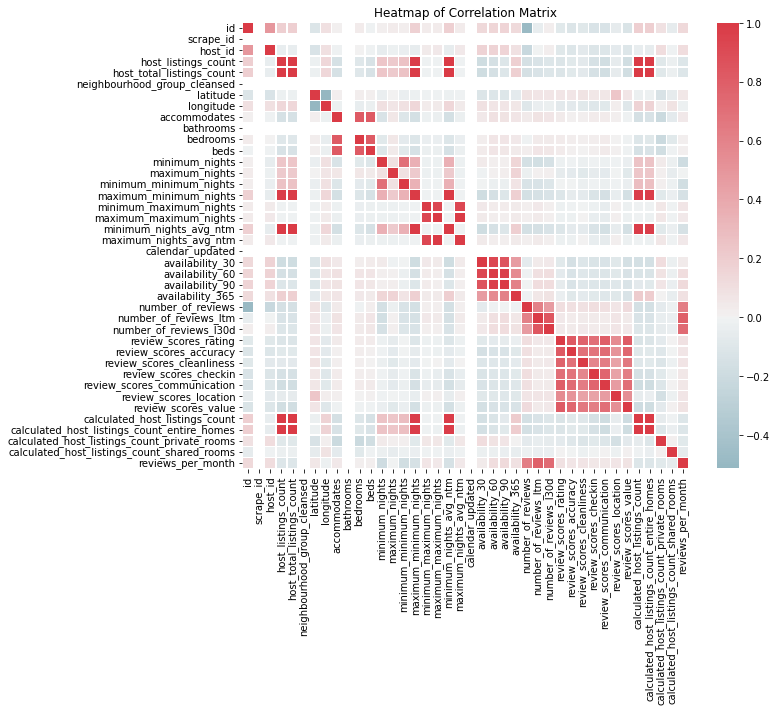

In [ ]:
#correlation matrix
corr_matrix = df_listings.corr()

# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220,10,as_cmap = True)

#Deep dive into diverging_pattern
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values,
           yticklabels=corr_matrix.columns.values, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix');

## Train & Test Split

#### Price 23

In [ ]:
#cleaning price column and converting the price to float
df_listings['price'] = (df_listings['price'].str.replace('$', '')).str.replace(',','')
df_listings['price'] = pd.to_numeric(df_listings['price'])

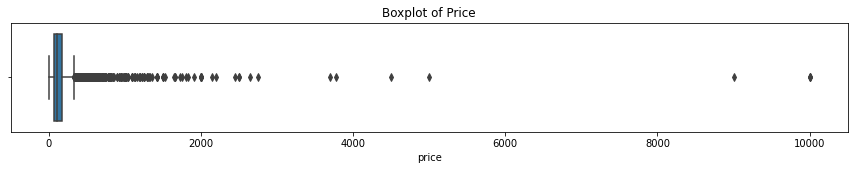

In [ ]:
plt.figure(figsize=(15, 2))
ax = sns.boxplot(x = 'price', data=df_listings).set(title='Boxplot of Price');

In [ ]:
#looking for rows with price = 0
df_listings.loc[df_listings['price'] == 0]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3847,41740623,https://www.airbnb.com/rooms/41740623,20211215062239,2021-12-15,"The Hoxton, Chicago - Cosy Room",NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,273328293,https://www.airbnb.com/users/show/273328293,The Hoxton,2019-07-03,US,NaN,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/62899...,https://a0.muscache.com/im/pictures/user/62899...,West Loop/Greektown,1.0,1.0,"['email', 'phone', 'work_email']",t,t,NaN,Near West Side,NaN,41.88699,-87.64813,Room in boutique hotel,Hotel room,2,NaN,NaN,NaN,NaN,"[""Outdoor pool, seasonal"", ""Pets allowed"", ""Sa...",0.0,1,365,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,0,0,2021-12-15,45,26,2,2019-10-19,2021-11-28,4.73,4.91,4.84,4.84,4.69,4.93,4.64,NaN,f,1,0,0,0,1.71
4096,43078540,https://www.airbnb.com/rooms/43078540,20211215062239,2021-12-15,Found Hotel Chicago River North,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,315027620,https://www.airbnb.com/users/show/315027620,Found Hotel Chicago River North,2019-12-06,"Chicago, Illinois, United States",NaN,within an hour,97%,98%,f,https://a0.muscache.com/im/pictures/user/92da1...,https://a0.muscache.com/im/pictures/user/92da1...,River North,7.0,7.0,"['email', 'phone']",t,t,NaN,Near North Side,NaN,41.89288,-87.63377,Room in boutique hotel,Hotel room,0,NaN,NaN,NaN,NaN,"[""Fire extinguisher"", ""Hangers"", ""Game room"", ...",0.0,1,365,1,1,365,365,1.0,365.0,NaN,t,0,0,0,0,2021-12-15,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,4,0,3,0,NaN


In [ ]:
#dropping rows with price = 0
df_listings = df_listings.loc[df_listings['price'] != 0]
df_listings.reset_index(drop=True, inplace=True)
df_listings.shape

(6542, 74)

##### Skewness (skipped)

We did not use the log price beacuase since it did not affect our model performance except the linear model.


In [ ]:
# #skewness and kurtosis

# sns.displot(df_train['price'], kde=True,);
# fig = plt.figure()
# res = stats.probplot(df_train['price'], plot=plt)
# print("Skewness: %f" % df_train['price'].skew())
# print("Kurtosis: %f" % df_train['price'].kurt())

In [ ]:
# print(df_train["price"].quantile(0.995))
# print(df_train["price"].mean())
# print(df_train["price"].median())

In [ ]:
# #removing outliers to decrease skew and kurtosis
# df_train = df_train[df_train["price"]<df_train["price"].quantile(0.995)].reset_index(drop=True)
# #####only for the graph below, please comment out the line when we are running the model#####

In [ ]:
# sns.displot(df_train['price'], kde=True,);
# fig = plt.figure()
# res = stats.probplot(df_train['price'], plot=plt)
# print("Skewness: %f" % df_train['price'].skew())
# print("Kurtosis: %f" % df_train['price'].kurt())

In [ ]:
# performing log transformation
# df_train['price'] = np.log(df_train['price'])
# #####only for the graph below, please comment out the line when we are running the model#####
# sns.distplot(df_train['price'])
# fig = plt.figure()

In [ ]:
# print(df_train['price'].skew())
# print(df_train['price'].kurtosis())

In [ ]:
# sns.displot(df_train['price'], kde=True,);
# fig = plt.figure()
# res = stats.probplot(df_train['price'], plot=plt)
# print("Skewness: %f" % df_train['price'].skew())
# print("Kurtosis: %f" % df_train['price'].kurt())

##### Outliers

Look at the potential outliers.

In [ ]:
# Based on the boxplot of the price chart, we think 3000 dollars is a good cut point to determinate the outliers.
df_listings.loc[df_listings['price'] > 3000, ['id', 'listing_url', 'host_url', 'host_listings_count', 'neighbourhood', 
                                              'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 
                                              'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'price', 
                                              'number_of_reviews', 'review_scores_rating']].sort_values('price')

,id,listing_url,host_url,host_listings_count,neighbourhood,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,number_of_reviews,review_scores_rating
2697,33251879,https://www.airbnb.com/rooms/33251879,https://www.airbnb.com/users/show/1254363,3.0,"Chicago, Illinois, United States",Lake View,Entire rental unit,Entire home/apt,6,NaN,2 baths,2.0,2.0,3690.0,0,NaN
6307,53111489,https://www.airbnb.com/rooms/53111489,https://www.airbnb.com/users/show/170785489,63.0,NaN,Near North Side,Entire rental unit,Entire home/apt,16,NaN,10 baths,11.0,20.0,3770.0,0,NaN
2893,35060034,https://www.airbnb.com/rooms/35060034,https://www.airbnb.com/users/show/5228189,25.0,"Chicago, Illinois, United States",West Town,Entire condominium (condo),Entire home/apt,16,NaN,6 baths,9.0,13.0,4500.0,0,NaN
5867,51400588,https://www.airbnb.com/rooms/51400588,https://www.airbnb.com/users/show/12093833,0.0,NaN,Lake View,Private room in condominium (condo),Private room,2,NaN,1 private bath,1.0,1.0,5000.0,0,NaN
2938,35421741,https://www.airbnb.com/rooms/35421741,https://www.airbnb.com/users/show/34697612,2.0,"Chicago, Illinois, United States",Lake View,Entire rental unit,Entire home/apt,6,NaN,1 bath,3.0,3.0,9000.0,0,NaN
971,15287352,https://www.airbnb.com/rooms/15287352,https://www.airbnb.com/users/show/45401863,2.0,"Chicago, Illinois, United States",Lake View,Entire residential home,Entire home/apt,16,NaN,5 baths,6.0,12.0,9999.0,16,5.00
3093,36668214,https://www.airbnb.com/rooms/36668214,https://www.airbnb.com/users/show/265201380,3.0,"Chicago, Illinois, United States",Loop,Room in boutique hotel,Hotel room,2,NaN,2 shared baths,1.0,2.0,9999.0,3,5.00
2563,31669125,https://www.airbnb.com/rooms/31669125,https://www.airbnb.com/users/show/237029902,1.0,"Chicago, Illinois, United States",Avondale,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.0,1.0,10000.0,26,4.92


In [ ]:
# We found other five listings that contained too many null value from our later feature selection. We decided to drop those row here to make our code to look consistence.
df_listings[df_listings['id'].isin([41938237, 41952522, 41938239, 41952515, 19044554])]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1255,19044554,https://www.airbnb.com/rooms/19044554,20211215062239,2021-12-15,Living Room by the Lake,You will have the living room to yourself whic...,The neighborhood is the most diverse neighborh...,https://a0.muscache.com/pictures/823c35f1-8843...,5103368,https://www.airbnb.com/users/show/5103368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Chicago, Illinois, United States",Rogers Park,NaN,42.01576,-87.66916,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Essentials"", ""Lockbox"", ""Hangers"", ""Heating""...",40.0,2,1125,2,2,1125,1125,2.0,1125.0,NaN,t,30,60,90,90,2021-12-15,58,16,0,2017-06-10,2021-10-18,4.6,4.62,4.5,4.68,4.84,4.82,4.7,City registration pending,t,1,0,1,0,1.05
3899,41938237,https://www.airbnb.com/rooms/41938237,20211215062239,2021-12-18,"Posh Hotel Blake, 1 Bedroom Suite Sleeps Two",Hotel Blake - Chicago - 1 Bedroom<br /><br />...,Resort Description:<br /><br />Situated in dow...,https://a0.muscache.com/pictures/prohost-api/H...,194953121,https://www.airbnb.com/users/show/194953121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Chicago, Illinois, United States",Loop,NaN,41.87422,-87.63030,Entire condominium (condo),Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Bathtub"", ""TV with standard cable"", ""Essenti...",499.0,2,182,2,2,182,182,2.0,182.0,NaN,t,0,0,0,0,2021-12-18,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,City registration pending,t,4,4,0,0,NaN
3900,41938239,https://www.airbnb.com/rooms/41938239,20211215062239,2021-12-18,Hotel Blake - Chicago- 1 Bedroom Suite,Hotel Blake - Chicago - 1 Bedroom<br /><br />...,Resort Description:<br /><br />Situated in dow...,https://a0.muscache.com/pictures/prohost-api/H...,194953121,https://www.airbnb.com/users/show/194953121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Chicago, Illinois, United States",Loop,NaN,41.87585,-87.62987,Entire condominium (condo),Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""TV"", ""Gym"", ""Hair dryer"", ""Dedicated workspa...",499.0,2,182,2,2,182,182,2.0,182.0,NaN,t,0,0,0,0,2021-12-18,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,City registration pending,t,4,4,0,0,NaN
3903,41952515,https://www.airbnb.com/rooms/41952515,20211215062239,2021-12-18,"Hotel Blake, Chicago Illinois, Hotel Standard","Hotel Blake, Chicago Illinois, Hotel Standard<...",Resort Description:<br /><br />Situated in dow...,https://a0.muscache.com/pictures/prohost-api/H...,194953121,https://www.airbnb.com/users/show/194953121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Chicago, Illinois, United States",Loop,NaN,41.87413,-87.63064,Entire residential home,Entire home/apt,2,NaN,1 bath,1.0,

**Noise**
- 33251879 - REMOVE
    - https://www.airbnb.com/rooms/33251879 \$3,690 is the monthly price
    - https://www.airbnb.com/rooms/841024 \$239 is the actual price (found through the host's page https://www.airbnb.com/users/show/1254363)
- 53111489
    - https://www.airbnb.com/rooms/53111489 new listing; price plunged from \$3,770 to \$2,042; no reviews yet
- 35060034
    - https://www.airbnb.com/rooms/35060034 seems legit
- 51400588 - REMOVE
    - https://www.airbnb.com/rooms/51400588 403 error
- 35421741 - REMOVE
    - https://www.airbnb.com/rooms/35421741 403 error
- 15287352 - REMOVE
    - https://www.airbnb.com/rooms/15287352 403 error
- 36668214 - REMOVE
    - https://www.airbnb.com/rooms/36668214 403 error
- 31669125 - REMOVE
    - https://www.airbnb.com/rooms/31669125 not worth \$10,000; room not available but doesn't want to take off the listing

Some other faulty listings...
- 41938237 - REMOVE
    - https://www.airbnb.com/rooms/41938237 403 error
- 41952522 - REMOVE
    - https://www.airbnb.com/rooms/41952522 403 error
- 41938239 - REMOVE 
    - https://www.airbnb.com/rooms/41938239 403 error
- 41952515 - REMOVE 
    - https://www.airbnb.com/rooms/41952515 403 error
- 19044554 - REMOVE
    - https://www.airbnb.com/rooms/19044554 too many missing values

In [ ]:
drop_ids = [33251879, 51400588, 35421741, 15287352, 36668214, 31669125, 
            41938237, 41952522, 41938239, 41952515, 19044554]
df_listings = df_listings[~df_listings['id'].isin(drop_ids)]
df_listings.reset_index(drop=True, inplace=True)

In [ ]:
df_listings.price.describe()

count    6531.000000
mean      160.774920
std       200.240412
min        10.000000
25%        72.000000
50%       113.000000
75%       177.000000
max      4500.000000
Name: price, dtype: float64

#### Split

In [ ]:
seed = 1

In [ ]:
df_train, df_test = train_test_split(df_listings, test_size = 0.17, random_state = seed)

## Data Overview

#### EDA

##### Host Description

In [ ]:
df_train.description = df_train.description.astype(str)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Creating the text variable
text = " ".join(cat for cat in df_train.description)
text = text.replace('br', '').replace('Chicago', '')

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

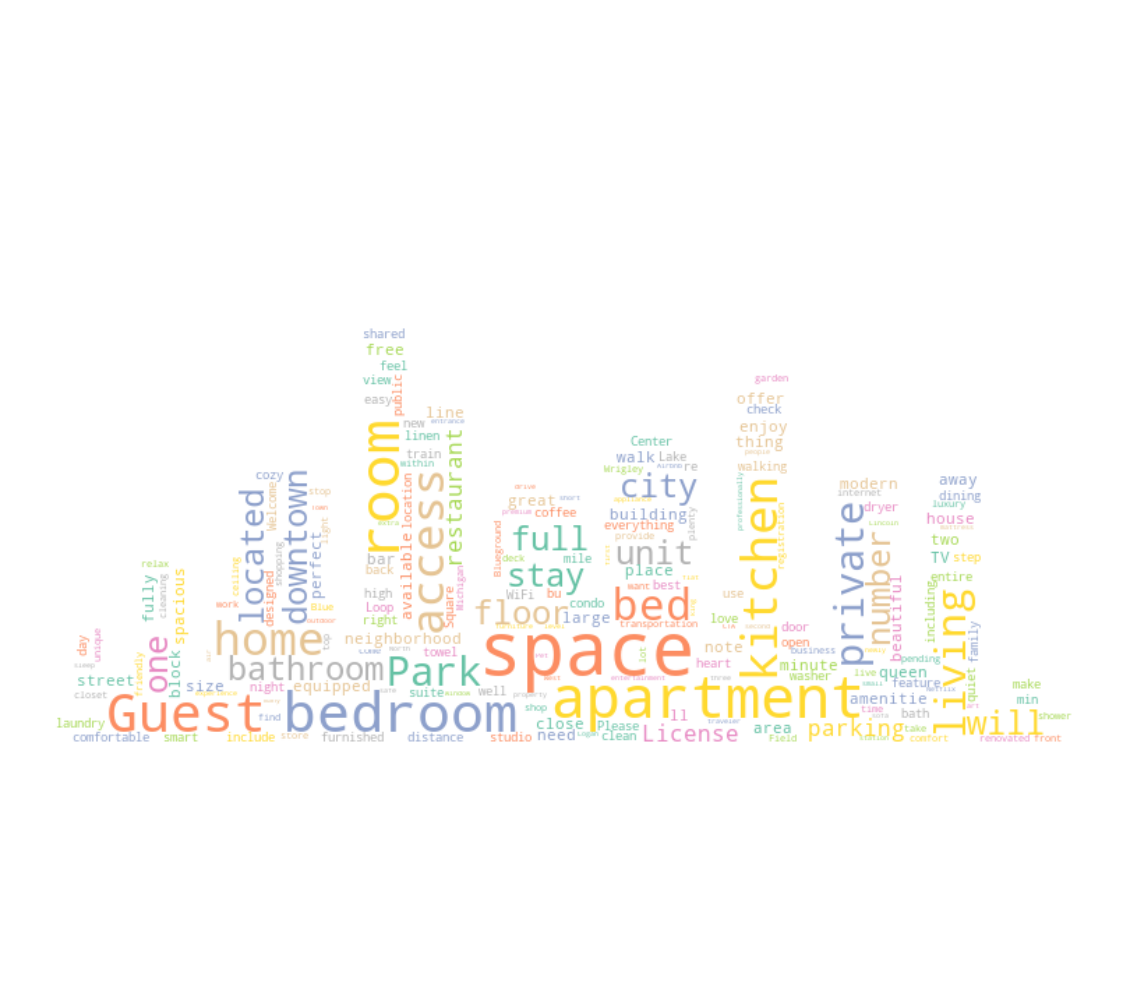

In [ ]:
# Creating word_cloud with text as argument in the host description feature that helps us to gain some insights of what host thinks is important of their listings. 
skyline_mask = np.array(Image.open("/content/drive/My Drive/Data151221/Skyline.jpeg"))
word_cloud = WordCloud(collocations = False, background_color = 'white', colormap = 'Set2', mask = skyline_mask).generate(text)
# Display the generated Word Cloud
plt.rcParams['figure.figsize'] = (20, 20)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### Property Type

In [ ]:
# Creating word_cloud with text as argument in the property feature that helps us to gain some insights of the frequency of each type of properties in the the dataset.
properties = [p[-1].lower() for p in df_train['property_type'].str.split(' in |Entire ')]

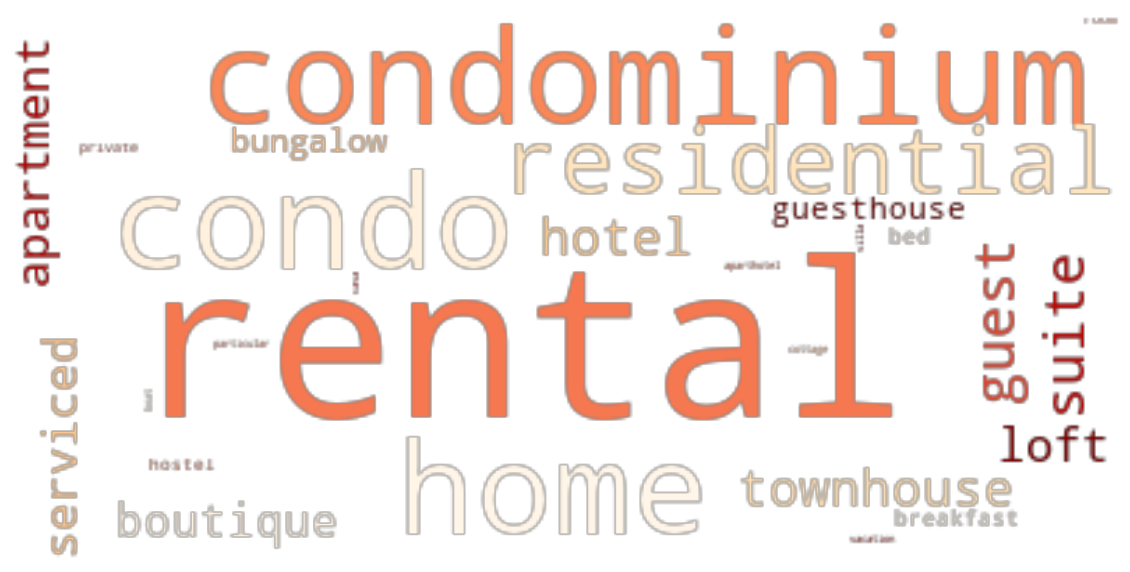

In [ ]:
text = ' '.join(properties)
text = text.replace('unit', '')
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = None, 
                       mode = "RGBA", colormap = 'OrRd').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### Amentites

In [ ]:
amenities = df_train.amenities.copy()

In [ ]:
amenities

2106    ["Shampoo", "Stove", "Fire pit", "Cooking basi...
1637    ["Essentials", "Shampoo", "Pool", "Hangers", "...
501     ["Shampoo", "Cable TV", "Stove", "Cooking basi...
2611    ["Shampoo", "Free dryer \u2013 In unit", "Fire...
4914    ["Shampoo", "Stove", "Cooking basics", "Hot wa...
                              ...                        
905     ["Shampoo", "Cable TV", "Stove", "Cooking basi...
5192    ["Shampoo", "Stove", "Cooking basics", "Hot wa...
3980    ["Shampoo", "Cable TV", "Hot water", "Iron", "...
235     ["Shampoo", "Cable TV", "Iron", "Keypad", "Fir...
5157    ["Shampoo", "Stove", "Cooking basics", "Hot wa...
Name: amenities, Length: 5420, dtype: object

In [ ]:
# Converting string to list
list_amenities = amenities[0].strip('][""').split('", "')

In [ ]:
import re
text = ''
for am in amenities:
  item_list = am.strip('][""').split('", "')
  for item in item_list:
    text = text + ' ' + re.sub('[^a-zA-Z]+', ' ', item)

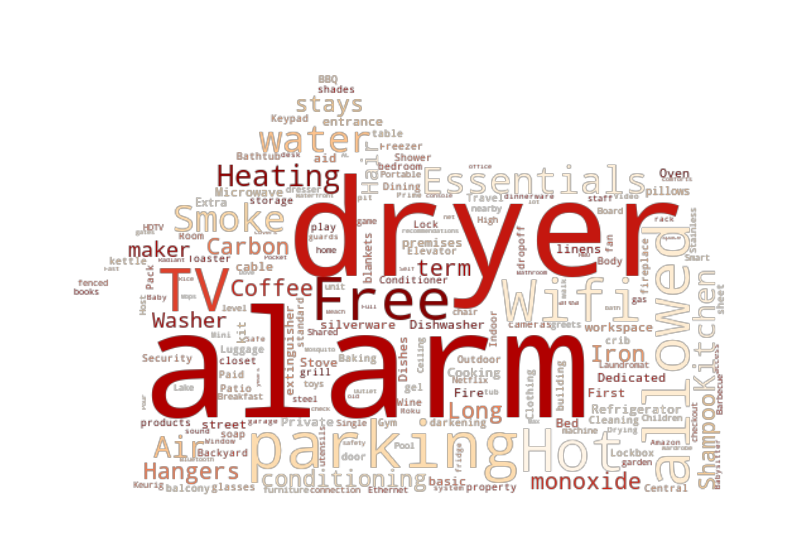

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Creating word_cloud with text as argument in the amenities feature that helps us to gain some insights of frequency of amenities in the dataset.  
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 9.0)

house_mask = np.array(Image.open("/content/drive/My Drive/Data151221/house_mask.jpeg"))
stopwords = set(STOPWORDS)

word_cloud = WordCloud(collocations = False, background_color = None, 
                       mode = "RGBA", colormap = 'OrRd_r', stopwords=stopwords, 
                       mask = house_mask).generate(text)
# Display the generated Word Cloud
plt.figure( figsize=(20,10))
plt.imshow(word_cloud, interpolation='bilinear', )
plt.axis("off")
plt.show()

### Feature Selection I

In [ ]:
#selecting relevant columns based on domain knowledge 
incl = ["id","host_id", "host_since", "host_acceptance_rate", "host_location", "host_response_time", "host_response_rate", "host_is_superhost", 
        "host_neighbourhood", "host_listings_count", "host_total_listings_count", "host_has_profile_pic", "host_identity_verified",
        "neighbourhood", "neighbourhood_cleansed", "latitude", "longitude", "property_type", "room_type", "accommodates", 
        "bathrooms_text", "bedrooms", "beds", "amenities", "price", "minimum_nights", "maximum_nights", "has_availability",
       "availability_90", "number_of_reviews", "number_of_reviews_ltm", "review_scores_rating", "review_scores_accuracy",
       "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location",
       "review_scores_value", "instant_bookable"] 

df_train = df_train[incl]

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5420 entries, 2106 to 5157
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5420 non-null   int64  
 1   host_id                      5420 non-null   int64  
 2   host_since                   5420 non-null   object 
 3   host_acceptance_rate         4382 non-null   object 
 4   host_location                5411 non-null   object 
 5   host_response_time           4196 non-null   object 
 6   host_response_rate           4196 non-null   object 
 7   host_is_superhost            5420 non-null   object 
 8   host_neighbourhood           5047 non-null   object 
 9   host_listings_count          5420 non-null   float64
 10  host_total_listings_count    5420 non-null   float64
 11  host_has_profile_pic         5420 non-null   object 
 12  host_identity_verified       5420 non-null   object 
 13  neighbourhood  

In [ ]:
df_train.isna().sum()

id                                0
host_id                           0
host_since                        0
host_acceptance_rate           1038
host_location                     9
host_response_time             1224
host_response_rate             1224
host_is_superhost                 0
host_neighbourhood              373
host_listings_count               0
host_total_listings_count         0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood                  1486
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                   11
bedrooms                        467
beds                            160
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability            

### Data Cleaning (Train)

#### Host-related 1-11

##### Host_since

In [ ]:
# we create a new variable host_day that count the days since the host list their porperty on airbnb.
import datetime as dt
df_train['date'] = pd.to_datetime('2021-12-18')
df_train['host_since'] = pd.to_datetime(df_train['host_since'], format = "%Y-%m-%d")
df_train['host_days'] = df_train['date'] - df_train['host_since'] 
df_train['host_days'] = df_train['host_days'].astype(str)
df_train['host_days']= df_train['host_days'].str.replace('days', '')
df_train['host_days'].mode()
df_train['host_days'] = df_train['host_days'].fillna(value=1825)
df_train['host_days'].isnull().sum()

0

In [ ]:
import datetime as dt
df_train['host_since'] = pd.to_datetime(df_train['host_since'], format = "%Y-%m-%d")
year = df_train['host_since'].dt.year

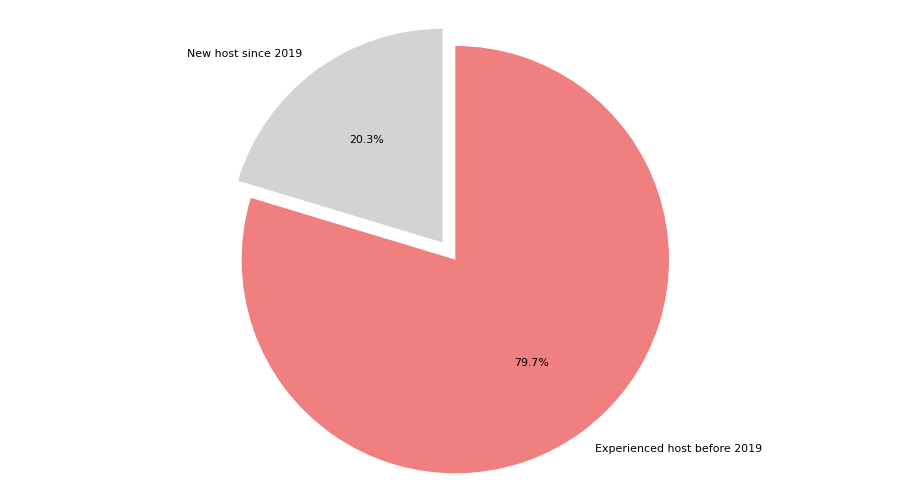

In [ ]:
import matplotlib.pyplot as plt

exp = df_train.loc[year < 2019].shape[0]
new = df_train.loc[year >= 2019].shape[0]

labels = 'New host since 2019', 'Experienced host before 2019'
sizes = [new, exp]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%', 
        startangle=90, colors = ['lightgray', 'lightcoral'], textprops={'fontsize': 11})
ax1.axis('equal')  

plt.show()

##### Host_response_time

In [ ]:
# Clean up the hsot response time features
df_train['host_response_time'].value_counts(normalize=True)

within an hour        0.783127
within a few hours    0.121306
within a day          0.070543
a few days or more    0.025024
Name: host_response_time, dtype: float64

In [ ]:
df_train['response_score'] = df_train['host_response_time'].apply(lambda x: 1 if x in ['within an hour', 'within a few hours', 'within a day'] else 0) 

In [ ]:
df_train['response_score'].value_counts()

1    4091
0    1329
Name: response_score, dtype: int64

##### host_accept_rate

In [ ]:
# Clean up the host acceptance rate feature. Since the majority of the host want to sucessfully rent their property, we assume the host acceptance rate is 100 percent for the null value.
df_train["host_acceptance_rate"].fillna('100%', inplace=True)

In [ ]:
df_train["host_acceptance_rate"] = df_train["host_acceptance_rate"].str[:-1].astype("float") / 100

In [ ]:
df_train["host_acceptance_rate"].describe()

count    5420.000000
mean        0.881666
std         0.219771
min         0.000000
25%         0.880000
50%         0.980000
75%         1.000000
max         1.000000
Name: host_acceptance_rate, dtype: float64

##### Super host 

In [ ]:
# Clean up the host is superhost column. 
df_train['host_is_superhost'].fillna('f', inplace=True)
df_train['host_is_superhost'].loc[df_train['host_is_superhost'] == 't'] = 1
df_train['host_is_superhost'].loc[df_train['host_is_superhost'] == 'f'] = 0
df_train['host_is_superhost'] = df_train['host_is_superhost'].astype('int')

##### Host Identity

In [ ]:
# Clean up the host identity verified column.
df_train['host_identity_verified'].fillna('f', inplace=True)
df_train['host_identity_verified'].loc[df_train['host_identity_verified'] == 't'] = 1
df_train['host_identity_verified'].loc[df_train['host_identity_verified'] == 'f'] = 0
df_train['host_identity_verified'] = df_train['host_identity_verified'].astype('int')

##### Host Days

In [ ]:
df_train['host_days'] = df_train['host_days'].astype('int')

#### Geographic Info 12-15

In [ ]:
#column selection
neighbourhood_col = ['id', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude', 'price']

In [ ]:
df_side = df_train.loc[:, neighbourhood_col].copy()

In [ ]:
df_side.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5420 entries, 2106 to 5157
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5420 non-null   int64  
 1   host_neighbourhood      5047 non-null   object 
 2   neighbourhood           3934 non-null   object 
 3   neighbourhood_cleansed  5420 non-null   object 
 4   latitude                5420 non-null   float64
 5   longitude               5420 non-null   float64
 6   price                   5420 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 467.8+ KB


In [ ]:
df_side.head()

,id,host_neighbourhood,neighbourhood,neighbourhood_cleansed,latitude,longitude,price
2106,27398741,Pullman,"Chicago, Illinois, United States",Pullman,41.68882,-87.60642,135.0
1637,22407641,Gold Coast,NaN,Near North Side,41.90458,-87.63012,250.0
501,7810030,NaN,"Chicago, Illinois, United States",West Town,41.89780,-87.68158,83.0
2611,32501823,Logan Square,"Chicago, Illinois, United States",West Town,41.89581,-87.65554,41.0
4914,48135056,Chicago Loop,"Chicago, Illinois, United States",Loop,41.86851,-87.62746,103.0


##### neighbourhood

In [ ]:
df_side['neighbourhood'].value_counts()

Chicago, Illinois, United States              3907
Forest Park, Illinois, United States             7
Chicago , Illinois, United States                4
Oak Lawn, Illinois, United States                3
Oak Park, Illinois, United States                2
Chicago, United States                           2
Rogers Park, Il, United States                   1
Chicago, Il, United States                       1
Norridge, Illinois, United States                1
Santa Barbara, California, United States         1
Harwood Heights, Illinois, United States         1
芝加哥, Illinois, United States                     1
Chicago Heights, Illinois, United States         1
Park Ridge, Illinois, United States              1
Bucktown, Chicago, Illinois, United States       1
Name: neighbourhood, dtype: int64

Since the neighbourhood data has many missing values and the info is mostly covered in neighbourhood_cleaned, we delete from dataframe.

In [ ]:
df_side = df_side.drop('neighbourhood', axis = 1)

##### neighbourhood_cleansed

In [ ]:
df_side.neighbourhood_cleansed.value_counts()

Near North Side           622
West Town                 561
Lake View                 459
Logan Square              338
Near West Side            329
Loop                      322
Lincoln Park              238
Uptown                    157
Lower West Side           148
Near South Side           144
Irving Park               132
Edgewater                 125
Bridgeport                109
North Center              105
Avondale                  105
Rogers Park               104
East Garfield Park         96
Grand Boulevard            79
Hyde Park                  77
Lincoln Square             76
South Shore                75
West Ridge                 66
Humboldt Park              64
Woodlawn                   63
Portage Park               54
Douglas                    49
Kenwood                    46
Albany Park                46
Armour Square              45
Austin                     42
Greater Grand Crossing     39
South Lawndale             34
Jefferson Park             31
Washington

We classify the neighbourhoods into 8 categories by their physical location in city. Ref: http://www.thechicago77.com/chicago-neighborhoods/

In [ ]:
farnorth = ['Rogers Park', 'West Ridge', 'Uptown', 'Lincoln Square', 'Edison Park', 'Norwood Park', 
             'Jefferson Park', 'Forest Glen', 'North Park', 'Albany Park', 'Ohare', 'Edgewater']
north = ['North Center', 'Lake View', 'Lincoln Park', 'Avondale', 'Logan Square']
northwest = ['Portage Park', 'Irving Park', 'Dunning', 'Montclare', 'Belmont Cragin', 'Hermosa']
central = ['Near North Side', 'Loop', 'Near South Side']
west = ['Humboldt Park', 'West Town', 'Austin', 'West Garfield Park', 'East Garfield Park',
        'Near West Side', 'North Lawndale', 'South Lawndale', 'Lower West Side']
southwest = ['Garfield Ridge', 'Archer Heights', 'Brighton Park', 'Mckinley Park', 'New City', 
             'West Elsdon', 'Gage Park', 'Clearing', 'West Lawn', 'Chicago Lawn',
             'West Englewood', 'Englewood']
south = ['Armour Square', 'Douglas', 'Oakland', 'Fuller Park', 'Grand Boulevard', 'Kenwood', 'Washington Park',
         'Hyde Park', 'Woodlawn', 'South Shore', 'Bridgeport', 'Greater Grand Crossing']
farsouthwest = ['Ashburn', 'Auburn Gresham', 'Beverly', 'Washington Heights', 'Mount Greenwood', 'Morgan Park']
farsouth = ['Chatham', 'Avalon Park', 'South Chicago', 'Burnside', 'Calumet Heights', 'Roseland',
            'Pullman', 'South Deering', 'East Side', 'West Pullman', 'Riverdale', 'Hegewisch']   
section_list = ['farnorth', 'north', 'northwest', 'central', 'west', 'southwest', 'south', 'farsouthwest','farsouth']    

In [ ]:
#Building a section dictionary
section_dict = {}
section_dict['farnorth'] = farnorth
section_dict['north'] = north
section_dict['northwest'] = northwest
section_dict['central'] = central
section_dict['west'] = west
section_dict['southwest'] = southwest
section_dict['south'] = south
section_dict['farsouthwest'] = farsouthwest
section_dict['farsouth'] = farsouth

In [ ]:
#Initialize the column 
df_side['neighbourhood'] = np.nan

#Iterate through dataframe to assign a category 
i = 0
for index, row in df_side.iterrows():
  for key, value in section_dict.items():
    if row['neighbourhood_cleansed'] in value:
      df_side.loc[index, 'neighbourhood'] = key

(0.0, 1000.0)

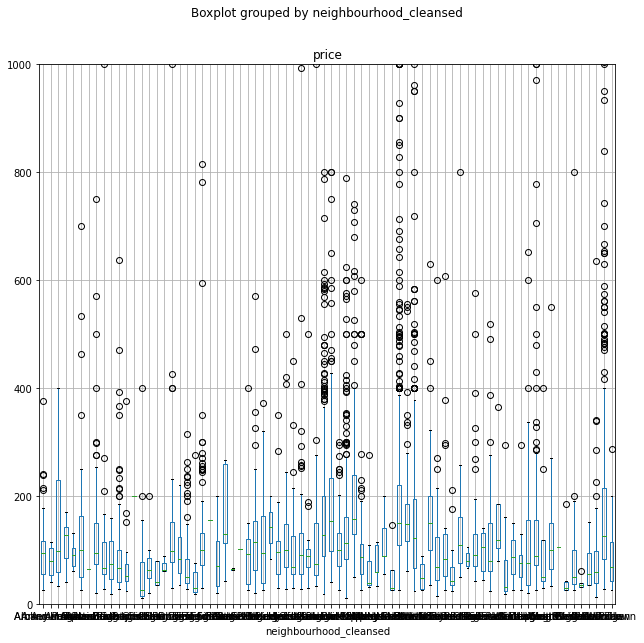

In [ ]:
ax = df_side.boxplot(column = 'price', by = 'neighbourhood_cleansed', figsize=(10,10))
ax.set_ylim([0, 1000]) 

(0.0, 1000.0)

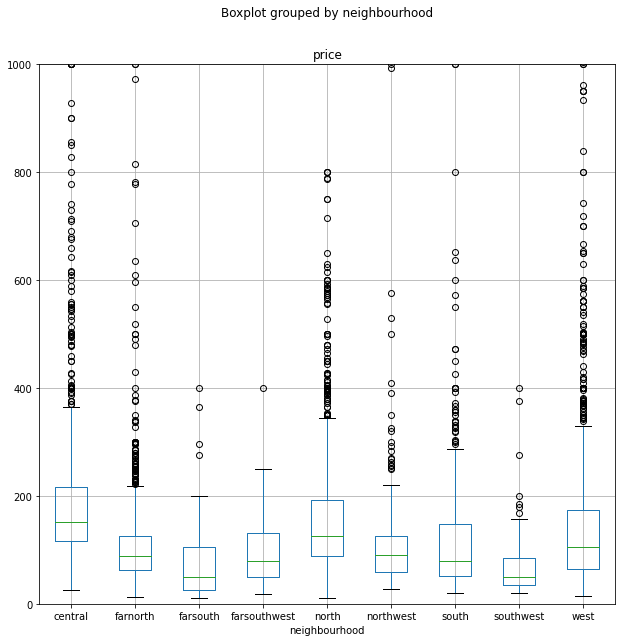

In [ ]:
ax = df_side.boxplot(column = 'price', by = 'neighbourhood', figsize=(10,10))
ax.set_ylim([0, 1000]) 

In [ ]:
!pip install geopandas

In [ ]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from matplotlib.pyplot import cm

In [ ]:
#load in base map 
path = '/content/drive/My Drive/Data151221/Chicago/'
map = gpd.read_file(path + 'geo_export_2c9ac419-e5f5-406a-ad37-2feda6235777.shp')

#set crs
crs = {'init':'epsg:4326'}
#set geometry points
geometry = [Point(xy) for xy in zip(df_side['longitude'], df_side['latitude'])]
#dataframe for plotting
df_side_geo = gpd.GeoDataFrame(df_side, crs = crs, geometry = geometry)

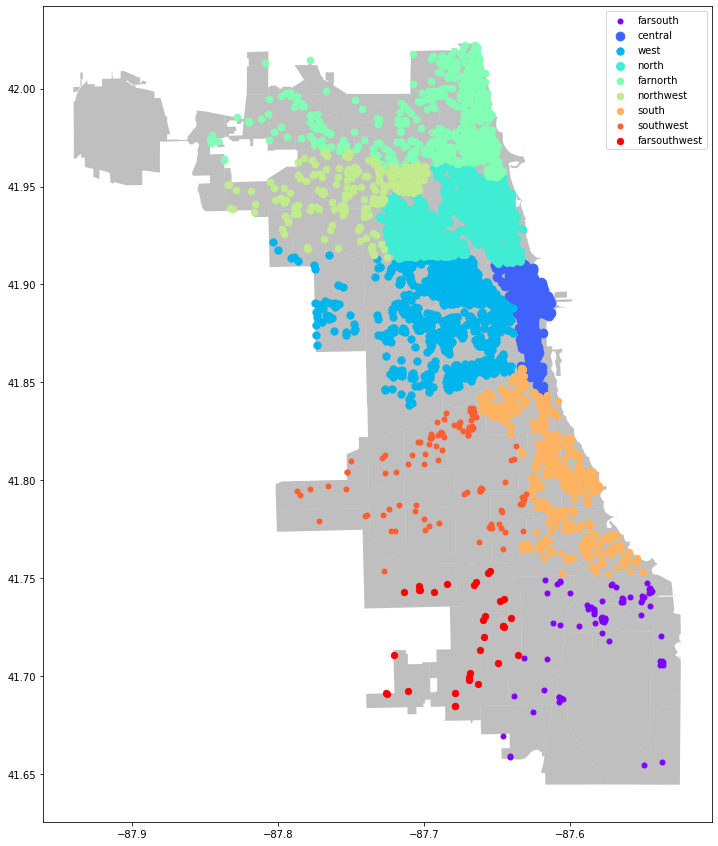

In [ ]:
fig,ax = plt.subplots(figsize=(15,15))
map.plot(ax = ax, alpha = .5, color = 'grey')
n = len(df_side['neighbourhood'].unique())
color = cm.rainbow(np.linspace(0, 1, n))
for i, c in zip(df_side['neighbourhood'].unique(), color):
  mid_price = df_side_geo[df_side_geo.neighbourhood == i].price.median()
  df_side_geo[df_side_geo.neighbourhood == i].plot(ax = ax, markersize=mid_price/2, color = c, label = i)
plt.legend(prop = {'size':10})

We see from the plots that physical location of neighbourhood does have impact on pricing. The postings in north and central area have the highest pricing, the northern area tend to have median price higher than those on the south side. 

In [ ]:
df_side = df_side.drop('neighbourhood_cleansed', axis = 1)

##### host_neighbourhood

In [ ]:
df_side.host_neighbourhood.value_counts().tail(10)

Old Naples         1
West Elsdon        1
Cabrini-Green      1
Barton Hills       1
South Loop         1
East Hyde Park     1
Casco Antiguo      1
East Downtown      1
Heart of Italy     1
Mount Greenwood    1
Name: host_neighbourhood, dtype: int64

In [ ]:
df_side.host_neighbourhood.head(20)

2106          Pullman
1637       Gold Coast
501               NaN
2611     Logan Square
4914     Chicago Loop
2105     Logan Square
6177        Cambridge
4531     Little Italy
2256         Lakeview
5037        Cambridge
82        Wicker Park
4604     Little Italy
5342              NaN
196          Lakeview
4200      Rogers Park
1544              NaN
3186      Bronzeville
6387    Garfield Park
3162      Rogers Park
2745           Pilsen
Name: host_neighbourhood, dtype: object

In [ ]:
df_side.host_neighbourhood.isna().sum()/len(df_side.host_neighbourhood)

0.06881918819188192

Host neighbourhood has 168 categories, much more than the 77 community areas in the Chicago. Upon a closer look, we find the input includes community areas in different formats, those are outside of Chicago, and those are sublevel to the official communities. Due to the difficulty aggregating the categories and filling the missing values, we drop the column from dataframe. 

In [ ]:
df_side = df_side.drop('host_neighbourhood', axis = 1)

##### latitude & longitude

In [ ]:
#Set the lat and log of Chicago city center; we choose the loop
from geopy.geocoders import Nominatim
geolocator = Nominatim()
cc = geolocator.geocode("Loop, Chicago, US")
cc

Location(Loop, Chicago, Cook County, Illinois, United States, (41.8816094, -87.6294574, 0.0))

In [ ]:
loop_lat, loop_long = cc.latitude, cc.longitude

In [ ]:
loop_lat, loop_long 

(41.8816094, -87.6294574)

In [ ]:
loop_lat - df_side.latitude

2106    0.192789
1637   -0.022971
501    -0.016191
2611   -0.014201
4914    0.013099
          ...   
905    -0.038941
5192   -0.096201
3980   -0.005121
235    -0.021591
5157   -0.049381
Name: latitude, Length: 5420, dtype: float64

In [ ]:
df_side.latitude.describe()

count    5420.000000
mean       41.897855
std         0.058812
min        41.654620
25%        41.872282
50%        41.899505
75%        41.938665
max        42.022200
Name: latitude, dtype: float64

In [ ]:
df_side.longitude.describe()

count    5420.000000
mean      -87.662749
std         0.042361
min       -87.846720
25%       -87.686615
50%       -87.658905
75%       -87.632068
max       -87.536380
Name: longitude, dtype: float64

In [ ]:
df_side['dist'] = np.sqrt((loop_lat - df_side.latitude)**2 + abs(loop_long - df_side.longitude)**2)

In [ ]:
df_side.dist.describe()

count    5420.000000
mean        0.068581
std         0.043835
min         0.001046
25%         0.031841
50%         0.065057
75%         0.095715
max         0.243316
Name: dist, dtype: float64

In [ ]:
#Hence we are keeping only grouped neighbourhood and id from the dataframe 
df_side = df_side[['neighbourhood', 'dist']]

##### Output

In [ ]:
df_side.to_csv(r'/content/drive/My Drive/Data151221/NeighbourhoodCategorized.csv')

In [ ]:
df_side.head()

,neighbourhood,dist
2106,farsouth,0.194161
1637,central,0.022980
501,west,0.054579
2611,west,0.029698
4914,central,0.013251


In [ ]:
pd.read_csv(r'/content/drive/My Drive/Data151221/NeighbourhoodCategorized.csv', index_col=0)

,neighbourhood,dist
2106,farsouth,0.194161
1637,central,0.022980
501,west,0.054579
2611,west,0.029698
4914,central,0.013251
...,...,...
905,north,0.062185
5192,farnorth,0.103694
3980,central,0.006868
235,central,0.022754


##### One Hot Encoding for neighbourhood

In [ ]:
neighbourhood_onehot = pd.get_dummies(df_side.neighbourhood, prefix='neighbourhood', drop_first=True)

#### Property Features 16-22

In [ ]:
import json
from tabulate import tabulate
from scipy.stats import pearsonr

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df_train.iloc[:, 17:24].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5420 entries, 2106 to 5157
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_type   5420 non-null   object 
 1   room_type       5420 non-null   object 
 2   accommodates    5420 non-null   int64  
 3   bathrooms_text  5409 non-null   object 
 4   bedrooms        4953 non-null   float64
 5   beds            5260 non-null   float64
 6   amenities       5420 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 467.8+ KB


In [ ]:
df_train.iloc[:, 17:24].isna().sum()

property_type       0
room_type           0
accommodates        0
bathrooms_text     11
bedrooms          467
beds              160
amenities           0
dtype: int64

##### 1. Property Type

Extract the last part to be property. 

In [ ]:
df_train['property'] = [p[-1].lower() for p in df_train['property_type'].str.split(' in |Entire ')]

In [ ]:
df_train.groupby('property')['price'].agg(['mean', 'median', 'count', 'min', 'max', 'std']).sort_values('median')

,mean,median,count,min,max,std
property,,,,,,
cabin,24.000000,24.0,1,24.0,24.0,NaN
farm stay,30.000000,30.0,1,30.0,30.0,NaN
cottage,47.000000,35.0,5,27.0,99.0,30.041638
casa particular,47.666667,35.0,3,33.0,75.0,23.692474
hostel,63.500000,36.0,12,31.0,172.0,44.598206
bungalow,65.652174,41.5,46,18.0,372.0,69.520330
private room,68.571429,69.0,7,55.0,80.0,7.253899
residential home,192.517241,80.0,725,11.0,2643.0,298.713413
guest suite,109.623457,89.0,162,34.0,600.0,76.235498


Since variance is large, group the properties by the median value. There are many different types of properties. Group similar ones together. 

In [ ]:
properties = df_train.groupby('property')['price'].agg('median').sort_values()

In [ ]:
# we divided the properties in to 5 groups based on their median value to make the group more robust to outliers
property_type = {col: 'group_0' for col in properties[properties < 80].index}
property_type.update({col: 'group_1' for col in properties[(80 <= properties) & (properties < 120)].index})
property_type.update({col: 'group_2' for col in properties[(120 <= properties) & (properties < 140)].index})
property_type.update({col: 'group_3' for col in properties[(140 <= properties) & (properties < 200)].index})
property_type.update({col: 'group_4' for col in properties[200 <= properties].index})

In [ ]:
property_type

{'aparthotel': 'group_3',
 'bed and breakfast': 'group_1',
 'boat': 'group_4',
 'boutique hotel': 'group_2',
 'bungalow': 'group_0',
 'cabin': 'group_0',
 'casa particular': 'group_0',
 'condominium (condo)': 'group_2',
 'cottage': 'group_0',
 'farm stay': 'group_0',
 'guest suite': 'group_1',
 'guesthouse': 'group_1',
 'home/apt': 'group_3',
 'hostel': 'group_0',
 'hotel': 'group_3',
 'loft': 'group_2',
 'place': 'group_4',
 'private room': 'group_0',
 'rental unit': 'group_1',
 'residential home': 'group_1',
 'serviced apartment': 'group_3',
 'tiny house': 'group_3',
 'townhouse': 'group_1',
 'vacation home': 'group_4',
 'villa': 'group_4'}

In [ ]:
df_train['property'] = df_train['property'].map(dict(property_type))

In [ ]:
df_train['property'] = df_train['property'].astype('category')

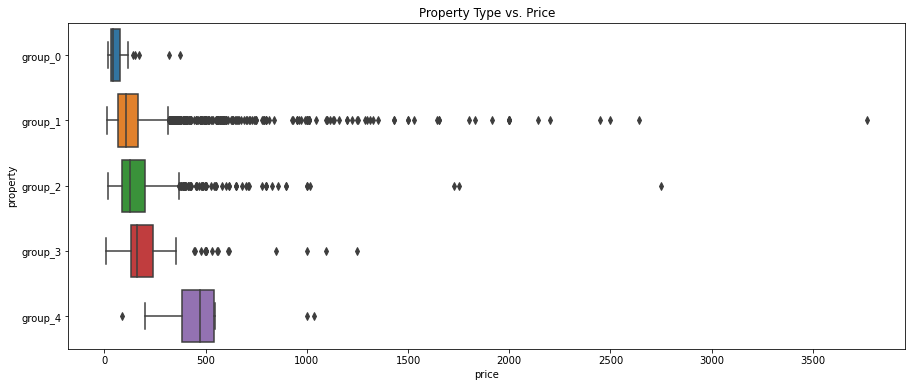

In [ ]:
plt.figure(figsize=(15, 6))
ax = sns.boxplot(x = 'price', y = 'property', orient='h', data=df_train).set(title='Property Type vs. Price');

In [ ]:
df_train = pd.get_dummies(df_train, columns=['property'])
df_train.drop(columns=['property_type'], inplace=True)

In [ ]:
# Examine the correlation between property group with the price
property_groups = ['property_group_0', 'property_group_1', 'property_group_2', 'property_group_3', 'property_group_4']
for property_group in property_groups:
    corr = pearsonr(df_train[property_group], df_train['price'])
    print(f'Group {property_group[-1]}: corr = {corr[0]: .4f}, p = {corr[1]: .4f}')

Group 0: corr = -0.0594, p =  0.0000
Group 1: corr = -0.0414, p =  0.0023
Group 2: corr =  0.0300, p =  0.0273
Group 3: corr =  0.0532, p =  0.0001
Group 4: corr =  0.0817, p =  0.0000


##### 2. Room Type

In [ ]:
df_train['room_type'].value_counts()

Entire home/apt    3946
Private room       1350
Shared room          76
Hotel room           48
Name: room_type, dtype: int64

In [ ]:
df_train['room_type'] = df_train['room_type'].astype('category')

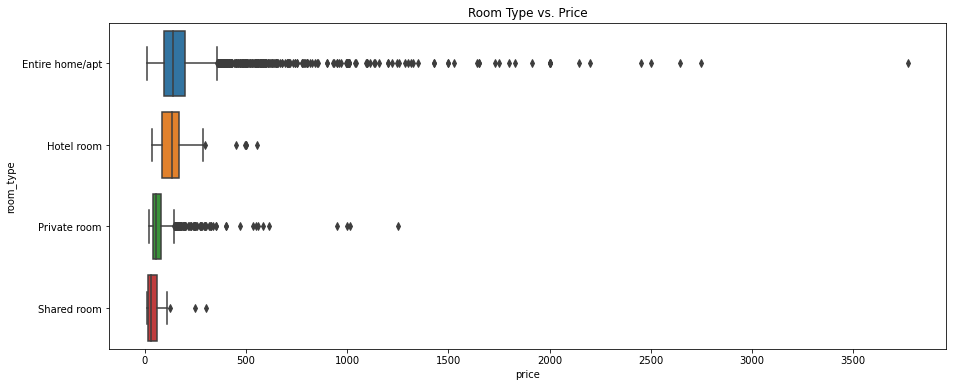

In [ ]:
plt.figure(figsize=(15, 6))
ax = sns.boxplot(x = 'price', y = 'room_type', orient = 'h', data=df_train).set(title='Room Type vs. Price');

In [ ]:
df_train['room_type'] = df_train['room_type'].str.lower().str.replace(' ', '_')
df_train = pd.get_dummies(df_train, columns=['room_type'])

##### 3. Bedrooms, Beds, Accommodates

In [ ]:
df_train[['accommodates', 'bedrooms', 'beds', 'price']].corr()

,accommodates,bedrooms,beds,price
accommodates,1.000000,0.815183,0.814581,0.500238
bedrooms,0.815183,1.000000,0.807110,0.565845
beds,0.814581,0.807110,1.000000,0.491519
price,0.500238,0.565845,0.491519,1.000000


In [ ]:
df_train[['accommodates', 'bedrooms', 'beds']].isna().sum()

accommodates      0
bedrooms        467
beds            160
dtype: int64

In [ ]:
df_accommodates = df_train[['accommodates', 'price']]

df_bedrooms = df_train[['bedrooms', 'price']]
df_bedrooms.dropna(subset=['bedrooms'], inplace=True)
df_bedrooms.reset_index(drop=True, inplace=True)

df_beds = df_train[['beds', 'price']]
df_beds.dropna(subset=['beds'], inplace=True)
df_beds.reset_index(drop=True, inplace=True)

print(pearsonr(df_accommodates['accommodates'], df_accommodates['price']))
print(pearsonr(df_bedrooms['bedrooms'], df_bedrooms['price']))
print(pearsonr(df_beds['beds'], df_beds['price']))

del df_bedrooms, df_beds, df_accommodates

(0.500237518279415, 0.0)
(0.5658454056892879, 0.0)
(0.4915186365705143, 4.1362e-318)


In [ ]:
# # Accommodates, bedrooms, and beds are highly correlated. Keeping one is enough for the model. Choose the optimal one based on RMSE & $R^2$.
# df_accommodates = df_train[['accommodates', 'price']]

# df_bedrooms = df_train[['bedrooms', 'price']]
# df_bedrooms.dropna(subset=['bedrooms'], inplace=True)
# df_bedrooms.reset_index(drop=True, inplace=True)

# df_beds = df_train[['beds', 'price']]
# df_beds.dropna(subset=['beds'], inplace=True)
# df_beds.reset_index(drop=True, inplace=True)

# print('RMSE     R2     Predictor')

# for df in [df_accommodates, df_bedrooms, df_beds]:
    
#     X = df.loc[:, df.columns != 'price']
#     y = df['price']
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    
#     model = LinearRegression()
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     print(f'{mean_squared_error(y_test, y_pred, squared=False):.4f} {r2_score(y_test, y_pred):.4f} {df.columns[0]}')
    
# del df_bedrooms, df_beds, df_accommodates
##  Bedrooms seems to be a better predictor than accommodates or beds. 

There are some missing values in bedrooms. Fill that with the mean value of bedrooms at each accommodates level. 

In [ ]:
df_train.loc[df_train['bedrooms'].isna(), 'accommodates'].value_counts()

2     284
4      91
3      54
1      28
6       5
5       3
16      1
7       1
Name: accommodates, dtype: int64

In [ ]:
ac_bdrm = df_train.groupby('accommodates')['bedrooms'].mean()

In [ ]:
ac_bdrm

accommodates
1     1.031153
2     1.031414
3     1.168044
4     1.668868
5     2.089701
6     2.458270
7     2.652893
8     3.145923
9     3.177778
10    3.500000
11    4.000000
12    3.948052
13    4.545455
14    4.090909
15    4.200000
16    5.214286
Name: bedrooms, dtype: float64

In [ ]:
df_train['bedrooms'] = df_train['bedrooms'].fillna(df_train.groupby('accommodates')['bedrooms'].transform('mean'))

In [ ]:
df_train[['accommodates', 'bedrooms', 'beds', 'price']].corr()

,accommodates,bedrooms,beds,price
accommodates,1.000000,0.821368,0.814581,0.500238
bedrooms,0.821368,1.000000,0.809004,0.527184
beds,0.814581,0.809004,1.000000,0.491519
price,0.500238,0.527184,0.491519,1.000000


Create several new measures that takes into account how crowd the room is based on the relationship between accommodates and bedrooms. This is an potential indicator of the square footage of the listing. 

In [ ]:
df_train['crowdedness'] = (df_train['accommodates'] > df_train['bedrooms']).astype(int)
df_train['crowdedness_diff'] = df_train['accommodates'] - df_train['bedrooms']
df_train['crowdedness_ratio'] = df_train['accommodates'] / df_train['bedrooms']
df_train['crowdedness_adj_ratio'] = (df_train['accommodates'] - df_train['bedrooms']) / df_train['bedrooms']

In [ ]:
df_train[['accommodates', 'bedrooms', 'crowdedness', 'crowdedness_diff', 'crowdedness_ratio', 'crowdedness_adj_ratio', 'price']].corr()

,accommodates,bedrooms,crowdedness,crowdedness_diff,crowdedness_ratio,crowdedness_adj_ratio,price
accommodates,1.000000,0.821368,0.290414,0.956291,0.468494,0.468494,0.500238
bedrooms,0.821368,1.000000,0.130560,0.618674,-0.029817,-0.029817,0.527184
crowdedness,0.290414,0.130560,1.000000,0.333074,0.375527,0.375527,0.099235
crowdedness_diff,0.956291,0.618674,0.333074,1.000000,0.660574,0.660574,0.418749
crowdedness_ratio,0.468494,-0.029817,0.375527,0.660574,1.000000,1.000000,0.069972
crowdedness_adj_ratio,0.468494,-0.029817,0.375527,0.660574,1.000000,1.000000,0.069972
price,0.500238,0.527184,0.099235,0.418749,0.069972,0.069972,1.000000


In [ ]:
crowdedness_measures = ['crowdedness', 'crowdedness_diff', 'crowdedness_ratio', 'crowdedness_adj_ratio']
for crowdedness_measure in crowdedness_measures:
    corr = pearsonr(df_train[crowdedness_measure], df_train['price'])
    print(f'{crowdedness_measure:>21}: corr = {corr[0]:.4f}, p = {corr[1]:.4f}')

          crowdedness: corr = 0.0992, p = 0.0000
     crowdedness_diff: corr = 0.4187, p = 0.0000
    crowdedness_ratio: corr = 0.0700, p = 0.0000
crowdedness_adj_ratio: corr = 0.0700, p = 0.0000


In [ ]:
df_train.drop(columns=['beds'], inplace=True)

##### 4. Amenities

Find the all unique amenities and count the number of occurrences for each amenity. </br>
*Note: df_train['amenities'] consists of lists stored in a string format while df_train['amenities_list'] consists of lists of strings.*

In [ ]:
df_train['amenities_list'] = df_train['amenities'].apply(json.loads)
amenities = [item for lst in df_train['amenities_list'] for item in lst]
unique_amenities = set(amenities)
amenities_dict = {unique_amenity: amenities.count(unique_amenity) for unique_amenity in unique_amenities}

Pick amenities based on the Pearson correlation coefficient between each amenity and the price. 

In [ ]:
def pick_amenities(min_freq=0.1, max_freq=0.9, coef=0.02, pval=0.05, weight=False): 
    '''
    Uses amenities_dict and returns a dataframe with amentities as columns. 
    :param min_freq: the minimum frequency that an amenity appears. 
    :param max_freq: the minimum frequency that an amenity appears. 
    :param coef: the minimum absolute correlation coefficient between amenity and price.
    :param pval: the maximum significance value of the correlation coefficient between amenity and price.
    :param weight: if True, turns dummies into correlation coefficients in the amenities dataframe.  
    '''
    
    table = [['amenities', 'freq.', 'corr.', 'p.']]
    n = len(df_train)
    df_amenities = pd.DataFrame(index=df_train.index)
    
    # one small caveat: 
    # freq in "if freq > min_freq" is not the actual frequency
    # amenities_dict searched through lists of strings
    # the frequency will likely be much higher when we search through lists in a string format
    # for example, suppose a home has amenities ["Iron", "HDTV"]
    # amenities_dict will not capture the count for "TV"; instead it only captures "HDTV"
    # but when we view the amenities as a string '["Iron", "HDTV"]', "TV" will be captured
    # min_freq threhold will always be true in filtering out the amenities
    # max_freq will likely be affected by this since the freq will only increase

    for amenity, count in amenities_dict.items():
        freq = count / n
        if freq > min_freq:
            df_amenities[amenity] = [amenity in lst for lst in df_train['amenities']]
            df_amenities[amenity] = df_amenities[amenity].astype(int)
            freq = sum(df_amenities[amenity]) / n
            corr = pearsonr(df_amenities[amenity], df_train['price'])
            if abs(corr[0]) > coef and corr[1] < pval and freq < max_freq: 
                if weight:
                    df_amenities[amenity] *= corr[0]
                table.append([amenity, freq, corr[0], corr[1]])
            else:
                df_amenities.drop(columns=[amenity], inplace=True)
                
    print(tabulate(table, floatfmt='.4f', headers='firstrow'))
        
    return df_amenities

In [ ]:
df_amenities = pick_amenities()

amenities                    freq.    corr.      p.
-------------------------  -------  -------  ------
Dishwasher                  0.5255   0.1563  0.0000
Long term stays allowed     0.8705   0.0290  0.0330
Paid parking off premises   0.1221   0.0346  0.0108
Shower gel                  0.2432  -0.0268  0.0487
Heating                     0.8480  -0.0420  0.0020
Patio or balcony            0.2199   0.0526  0.0001
Free street parking         0.5603  -0.0996  0.0000
Fire extinguisher           0.6755   0.0559  0.0000
Gym                         0.1758   0.0838  0.0000
Private entrance            0.4967   0.0571  0.0000
Dryer                       0.6589   0.0832  0.0000
Air conditioning            0.8590   0.0399  0.0033
Room-darkening shades       0.1648   0.0416  0.0022
Hair dryer                  0.8780   0.0437  0.0013
Hot water                   0.8266  -0.0758  0.0000
Laundromat nearby           0.1175  -0.0599  0.0000
Outdoor furniture           0.1245   0.0495  0.0003
Oven        

TV, Cable TV, TV with standard cable are the same idea. 

In [ ]:
df_amenities.drop(columns=['Cable TV', 'TV with standard cable'], inplace=True, errors='ignore')
df_amenities.columns = ['_'.join(col.lower().split()) for col in df_amenities.columns]

In [ ]:
df_amenities.columns

Index(['dishwasher', 'long_term_stays_allowed', 'paid_parking_off_premises',
       'shower_gel', 'heating', 'patio_or_balcony', 'free_street_parking',
       'fire_extinguisher', 'gym', 'private_entrance', 'dryer',
       'air_conditioning', 'room-darkening_shades', 'hair_dryer', 'hot_water',
       'laundromat_nearby', 'outdoor_furniture', 'oven', 'first_aid_kit',
       'free_parking_on_premises', 'indoor_fireplace', 'baking_sheet',
       'lockbox', 'keypad', 'washer', 'lock_on_bedroom_door', 'bathtub',
       'hangers', 'elevator', 'wine_glasses', 'coffee_maker', 'tv',
       'bbq_grill'],
      dtype='object')

In [ ]:
df_train = df_train.join(df_amenities)

In [ ]:
df_train.drop(columns=['amenities', 'amenities_list'], inplace=True)

In [ ]:
df_train.columns

Index(['id', 'host_id', 'host_since', 'host_acceptance_rate', 'host_location',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'accommodates', 'bathrooms_text', 'bedrooms',
       'price', 'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_90', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'date', 'host_days',
       'response_score', 'property_group_0', 'property_group_1',
       'property_group_2', 'property_group_3', 'property_group_4',
       'room_type_entire_home/apt', 'room_type_hotel_r

##### Bathroom


In [ ]:
#cleaning the bathrooms variable
df_train['bathrooms_privacy'] = df_train['bathrooms_text'].str.contains('shared')
df_train['bathrooms_privacy'] = df_train['bathrooms_privacy'].fillna(value = False)
df_train['bathrooms_privacy'].loc[df_train['bathrooms_privacy'] == 'True'] = 1
df_train['bathrooms_privacy'].loc[df_train['bathrooms_privacy'] == 'False'] = 0
df_train['bathrooms_privacy'].describe()

count      5420
unique        2
top       False
freq       4465
Name: bathrooms_privacy, dtype: object

In [ ]:
df_train['bathrooms_text'].unique()

array(['1.5 baths', '1 bath', '2 shared baths', '1 shared bath',
       '2 baths', '1 private bath', '2.5 baths', '3.5 baths',
       '1.5 shared baths', '3 baths', '8 shared baths', '4 baths',
       '5 baths', '4.5 baths', '12.5 baths', '3 shared baths',
       '2.5 shared baths', '4 shared baths', '6 baths', 'Half-bath',
       '11 shared baths', 'Shared half-bath', '0 baths', nan, '10 baths',
       '0 shared baths', '7 baths', 'Private half-bath', '5.5 baths',
       '7.5 baths', '6.5 baths', '11.5 shared baths'], dtype=object)

In [ ]:
df_train['bathrooms'] = df_train['bathrooms_text'].str.split().str.get(0)
df_train['bathrooms'] = np.where(df_train['bathrooms'] == 'Private', '0.5', df_train['bathrooms'])
df_train['bathrooms'] = np.where(df_train['bathrooms'] == 'Half-bath', '0.5', df_train['bathrooms'])
df_train['bathrooms'] = np.where(df_train['bathrooms'] == 'Shared', '0.5', df_train['bathrooms'])

In [ ]:
df_train['bathrooms'].astype('float')

2106    1.5
1637    1.0
501     1.0
2611    2.0
4914    1.0
       ... 
905     2.0
5192    1.0
3980    1.0
235     1.5
5157    3.5
Name: bathrooms, Length: 5420, dtype: float64

In [ ]:
df_train['bathrooms'].fillna(df_train['bathrooms'].mode()[0], inplace=True)
df_train['bathrooms'].isnull().sum()

0

In [ ]:
df_train['bathrooms_privacy'] = df_train['bathrooms_privacy'].map({False: 0, True: 1})

In [ ]:
df_train['bathrooms'] = df_train['bathrooms'].astype('float')

#### Availability 24-27, 37

In [ ]:
df_train[['minimum_nights', 'maximum_nights', 'has_availability', 'availability_90', 'instant_bookable']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5420 entries, 2106 to 5157
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   minimum_nights    5420 non-null   int64 
 1   maximum_nights    5420 non-null   int64 
 2   has_availability  5420 non-null   object
 3   availability_90   5420 non-null   int64 
 4   instant_bookable  5420 non-null   object
dtypes: int64(3), object(2)
memory usage: 383.1+ KB


In [ ]:
df_train['has_availability'] = df_train['has_availability'].replace({'t':1, 'f':0}).astype('int')
df_train['instant_bookable'] = df_train['instant_bookable'].replace({'t':1, 'f':0}).astype('int')

#### Reviews 30-36

In [ ]:
df_1 = df_train.filter(['price', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin'
                         'review_scores_communication', 'review_scores_location', 'review_scores_value'])

df = df_1.copy(deep=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5420 entries, 2106 to 5157
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      5420 non-null   float64
 1   review_scores_rating       4515 non-null   float64
 2   review_scores_accuracy     4494 non-null   float64
 3   review_scores_cleanliness  4494 non-null   float64
 4   review_scores_location     4493 non-null   float64
 5   review_scores_value        4493 non-null   float64
dtypes: float64(6)
memory usage: 425.4 KB


In [ ]:
df.head()

,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_location,review_scores_value
2106,135.0,4.83,4.96,4.74,4.78,4.93
1637,250.0,NaN,NaN,NaN,NaN,NaN
501,83.0,4.82,4.91,4.85,4.89,4.86
2611,41.0,4.88,4.97,4.87,4.95,4.90
4914,103.0,4.88,4.92,4.90,4.84,4.82


In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Columns': df.columns,
                                 'Missing Value Percentage': percent_missing})
missing_value_df

,Columns,Missing Value Percentage
price,price,0.000000
review_scores_rating,review_scores_rating,16.697417
review_scores_accuracy,review_scores_accuracy,17.084871
review_scores_cleanliness,review_scores_cleanliness,17.084871
review_scores_location,review_scores_location,17.103321
review_scores_value,review_scores_value,17.103321


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,5420.0,160.405351,194.968751,10.0,71.75,114.00,175.00,3770.0
review_scores_rating,4515.0,4.711079,0.513237,0.0,4.66,4.84,4.97,5.0
review_scores_accuracy,4494.0,4.794648,0.375991,1.0,4.75,4.90,5.00,5.0
review_scores_cleanliness,4494.0,4.731564,0.403319,1.0,4.65,4.85,4.98,5.0
review_scores_location,4493.0,4.780763,0.367972,1.0,4.73,4.89,5.00,5.0
review_scores_value,4493.0,4.691921,0.409002,1.0,4.63,4.79,4.91,5.0


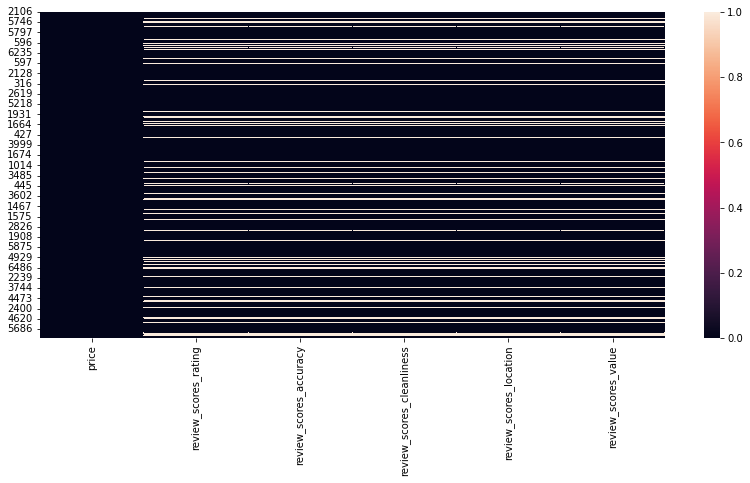

In [ ]:
# import matplotlib.pyplot as plt


plt.figure(figsize=(14,6))
sns.heatmap(df.isnull());

In [ ]:
df.groupby(['review_scores_rating']).size().sort_values(ascending=False).head(20)

review_scores_rating
5.00    959
4.88    116
4.00    115
4.83    110
4.50    109
4.67    102
4.86     99
4.80     99
4.89     99
4.97     98
4.94     97
4.92     97
4.95     90
4.90     90
4.93     88
4.75     87
4.91     83
4.82     80
4.78     78
4.84     76
dtype: int64

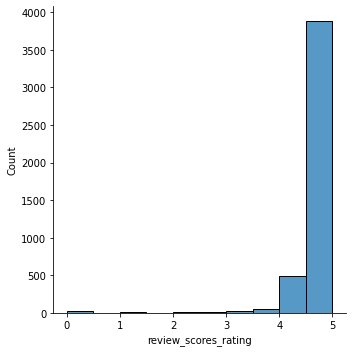

In [ ]:
import seaborn as sns
sns.displot(df, x = "review_scores_rating", bins=10);

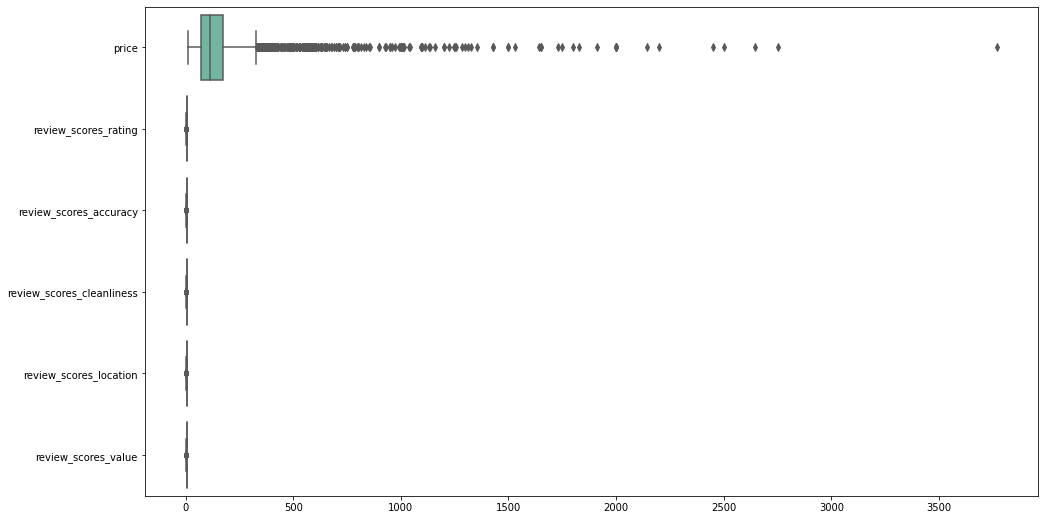

In [ ]:
ax = sns.boxplot(data=df, orient="h", palette="Set2")
 # p = sns.factorplot(data = df,height=8, aspect=15/8)

In [ ]:
df.groupby(['review_scores_rating']).size().head(20)

review_scores_rating
0.00    21
1.00    17
2.00     8
2.50     2
2.56     1
2.67     3
3.00    23
3.20     1
3.25     1
3.33     2
3.40     1
3.43     1
3.44     1
3.45     1
3.50     7
3.53     1
3.60     1
3.65     1
3.67    11
3.70     1
dtype: int64

In [ ]:
df.groupby(['review_scores_accuracy']).size().head(20)

review_scores_accuracy
1.00    19
2.00     3
2.67     1
3.00    25
3.25     1
3.33     1
3.38     1
3.50     7
3.57     1
3.60     1
3.67    12
3.74     1
3.80     4
3.83     5
3.86     1
3.88     1
3.89     1
3.90     1
3.91     2
3.92     1
dtype: int64

In [ ]:
df.groupby(['review_scores_cleanliness']).size().head(20)

review_scores_cleanliness
1.00    16
2.00     4
2.25     2
2.33     1
2.67     1
2.75     1
3.00    29
3.13     1
3.25     2
3.33     4
3.40     2
3.42     1
3.50    19
3.55     1
3.57     1
3.60     1
3.63     1
3.67     8
3.70     2
3.71     3
dtype: int64

In [ ]:
df_box = df.filter(['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_location', 'review_scores_value'])

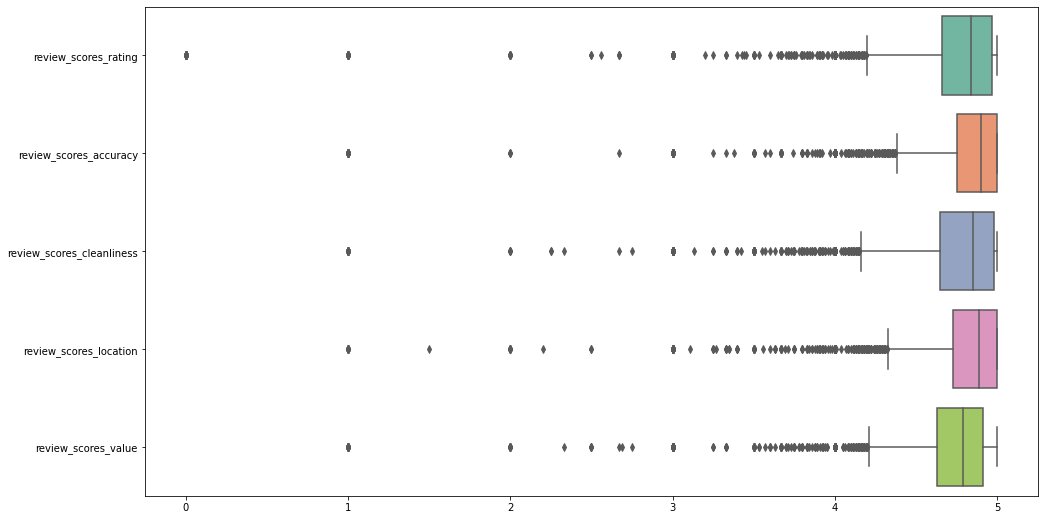

In [ ]:
ax = sns.boxplot(data=df_box, orient="h", palette="Set2")

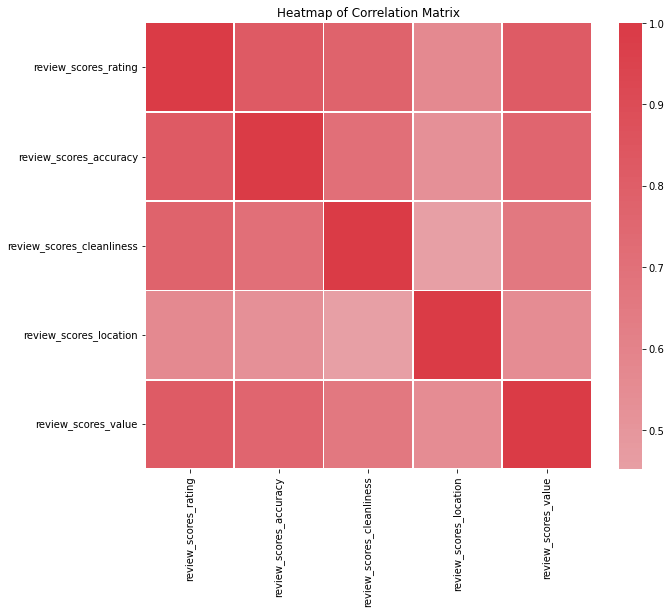

In [ ]:
#correlation matrix

corr_matrix = df_box.corr()

# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220,10,as_cmap = True)

#Deep dive into diverging_pattern
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values,
           yticklabels=corr_matrix.columns.values, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix');

In [ ]:
df['review_scores_rating'].fillna((df['review_scores_rating'].mean()), inplace=True)
df['review_scores_accuracy'].fillna((df['review_scores_accuracy'].mean()), inplace=True)
df['review_scores_cleanliness'].fillna((df['review_scores_cleanliness'].mean()), inplace=True)
df['review_scores_location'].fillna((df['review_scores_location'].mean()), inplace=True)
df['review_scores_value'].fillna((df['review_scores_value'].mean()), inplace=True)


**Cleaning up Reviews**

In [ ]:
get_nulls_unique(df_1).round(4)

,Columns,Nulls,Unique
0,price,0.0000,0.0952
1,review_scores_rating,0.1670,0.0256
2,review_scores_accuracy,0.1708,0.0210
3,review_scores_cleanliness,0.1708,0.0256
4,review_scores_location,0.1710,0.0240
5,review_scores_value,0.1710,0.0238


In [ ]:
# df_clean = df_train
df_clean = df_train.copy(deep=True)

In [ ]:
entries = df_clean.shape[0]
features = df_clean.shape[1]

print('Number of entries:', entries)
print('Number of features:', features)

Number of entries: 5420
Number of features: 86


In [ ]:
df_clean.groupby('bedrooms').size()

bedrooms
1.000000     2593
1.031153       28
1.031414      284
1.168044       54
1.668868       91
2.000000     1346
2.089701        3
2.458270        5
2.652893        1
3.000000      686
4.000000      214
5.000000       57
5.214286        1
6.000000       32
7.000000       11
8.000000        6
9.000000        3
10.000000       1
11.000000       1
12.000000       3
dtype: int64

We are trying to evaluate correlation betweem the review columns and all other features to examine the possibility of imputing missing values through regression.

In [ ]:

corr = df_clean.corr()
corr.style.background_gradient(cmap = "coolwarm").set_precision(2)

,id,host_id,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days,response_score,property_group_0,property_group_1,property_group_2,property_group_3,property_group_4,room_type_entire_home/apt,room_type_hotel_room,room_type_private_room,room_type_shared_room,crowdedness,crowdedness_diff,crowdedness_ratio,crowdedness_adj_ratio,dishwasher,long_term_stays_allowed,paid_parking_off_premises,shower_gel,heating,patio_or_balcony,free_street_parking,fire_extinguisher,gym,private_entrance,dryer,air_conditioning,room-darkening_shades,hair_dryer,hot_water,laundromat_nearby,outdoor_furniture,oven,first_aid_kit,free_parking_on_premises,indoor_fireplace,baking_sheet,lockbox,keypad,washer,lock_on_bedroom_door,bathtub,hangers,elevator,wine_glasses,coffee_maker,tv,bbq_grill,bathrooms_privacy,bathrooms
id,1.00,0.50,0.10,-0.19,0.19,0.19,0.05,-0.13,0.10,0.01,0.02,0.03,0.02,0.05,0.05,0.17,-0.48,-0.04,-0.09,-0.12,-0.09,-0.14,-0.13,-0.07,-0.12,0.19,-0.51,0.13,-0.01,-0.02,-0.01,0.08,0.02,0.10,-0.05,-0.08,-0.07,0.03,0.01,-0.00,-0.00,0.03,0.12,0.02,0.15,-0.23,-0.09,-0.24,-0.13,0.13,0.16,-0.14,-0.08,0.01,-0.08,0.00,0.11,0.02,-0.07,0.00,-0.03,-0.12,0.07,0.06,-0.09,-0.08,0.02,0.07,-0.00,0.11,0.13,-0.09,0.00,-0.02,-0.05,0.02
host_id,0.50,1.00,0.03,-0.14,-0.04,-0.04,-0.06,-0.14,0.10,-0.01,-0.01,0.03,-0.05,-0.01,0.01,0.17,-0.22,-0.01,-0.10,-0.10,-0.08,-0.12,-0.11,-0.08,-0.11,0.11,-0.93,0.04,0.00,-0.07,0.01,0.12,0.06,-0.01,-0.04,0.03,-0.04,-0.01,-0.01,-0.02,-0.02,-0.05,0.07,-0.02,0.08,-0.19,-0.06,-0.13,-0.06,0.01,0.04,-0.17,-0.06,-0.01,-0.11,-0.02,0.07,-0.07,-0.08,0.01,0.00,-0.08,-0.04,-0.05,-0.09,-0.11,0.09,-0.01,-0.03,-0.01,0.03,-0.13,-0.05,-0.09,0.03,-0.00
host_acceptance_rate,0.10,0.03,1.00,0.08,0.11,0.11,0.07,0.03,-0.05,0.06,0.04,-0.04,-0.14,-0.06,0.01,-0.14,0.12,0.16,0.04,0.07,0.06,0.04,0.04,0.01,0.07,0.32,-0.06,0.01,-0.01,0.02,0.01,-0.07,-0.00,0.02,-0.01,-0.02,0.03,0.03,0.05,0.01,0.01,0.06,-0.03,0.02,0.09,-0.06,-0.04,0.09,-0.03,-0.14,0.08,0.00,-0.02,0.06,0.04,0.04,0.07,0.04,0.04,-0.02,0.04,-0.09,0.05,0.12,0.12,0.01,0.00,0.12,0.00,-0.06,0.09,0.10,-0.01,-0.00,-0.00,0.04
host_is_superhost,-0.19,-0.14,0.08,1.00,-0.19,-0.19,0.01,0.05,-0.08,0.07,0.06,0.01,-0.04,-0.07,0.06,0.01,0.21,0.14,0.27,0.24,0.27,0.21,0.24,0.15,0.24,-0.11,0.17,0.13,-0.02,0.04,-0.03,-0.01,-0.01,0.01,-0.01,0.01,-0.07,0.02,0.06,0.02,0.02,0.07,-0.07,-0.04,0.11,0.01,0.04,0.24,0.19,-0.15,0.07,0.02,-0.04,0.13,0.14,0.09,0.04,0.13,0.06,0.13,0.10,0.05,0.14,-0.01,0.14,-0.01,0.01,0.09,0.06,-0.13,0.14,0.19,0.07,0.02,-0.04,-0.01
host_listings_count,0.19,-0.04,0.11,-0.19,1.00,1.00,0.11,-0.02,0.15,-0.14,-0.12,-0.02,0.25,0.22,0.03,-0.10,-0.15,-0.12,-0.11,-0.06,-0.07,-0.12,-0.16,-0.07,-0.17,0.31,-0.03,0.15,-0.03,0.13,-0.12,-0.04,-0.01,0.15,-0.02,-0.14,-0.03,0.07,-0.14,-0.09,-0.09,0.22,0.10,0.06,-0.14,0.08,-0.07,-0.28,-0.35,0.44,0.24,0.11,0.08,-0.11,0.09,0.11,-0.09,-0.10,0.19,-0.27,-0.18,-0.10,-0.11,0.38,-0.12,0.10,-0.12,0.15,0.09,0.44,-0.11,0.15,0.09,0.16,-0.11,-0.07
host_total_listings_count,0.19,-0.04,0.11,-0.19,1.00,1.00,0.11,-0.02,0.15,-0.14,-0.12,-0.02,0.25,0.22,0.03,-0.10,-0.15,-0.12,-0.11,-0.06,-0.07,-0.12,-0.16,-0.07,-0.17,0.31,-0.03,0.15,-0.03,0.13,-0.12,-0.04,-0.01,0.15,-0.02,-0.14,-0.03,0.07,-0.14,-0.09,-0.09,0.22,0.10,0.06,-0.14,0.08,-0.07,-0.28,-0.35,0.44,0.24,0.11,0.08,-0.11,0.09,0.11,-0.09,-0.10,0.19,-0.27,-0.18,-0.10,-0.11,0.38,-0.12,0.10,-0.12,0.15,0.09,0.44,-0.11,0.15,0.09,0.16,-0.11,-0.07
host_identity_verified,0.05,-0.06,0.07,0.01,0.11,0.11,1.00,-0.01,0.04,-0.00,-0.01,-0.03,0.01,0.04,0.03,-0.02,0.02,0.02,0.02,0.00,0.00,-0.01,-0.01,-0.01,-0.02,0.03,0.07,0.07,0.00,-0.01,-0.00,0.01,0.01,-0.03,0.04,0.02,

**Dealing with missing values in our reviews columns in three different ways:** <br> 
1. Dropping rows where we have missing values <br> 
2. Imputing the mean value <br> 
3. Using KNN to impute according to cluster mean <br> 

**1. Dropping rows with missing values** 

In [ ]:
# # df_dropped = df_clean
# df_dropped = df_clean.copy(deep=True)


In [ ]:
# df_dropped.dropna(subset=['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
#                   'review_scores_communication', 'review_scores_location', 'review_scores_value'], inplace=True)

**2. Replacing missing values with mean**

In [ ]:
# df_mean = df_clean.copy(deep=True)
# get_nulls_unique(df_mean).round(4)

In [ ]:
# df_mean['review_scores_rating'].fillna((df_mean['review_scores_rating'].mean()), inplace=True)
# df_mean['review_scores_accuracy'].fillna((df_mean['review_scores_accuracy'].mean()), inplace=True)
# df_mean['review_scores_cleanliness'].fillna((df_mean['review_scores_cleanliness'].mean()), inplace=True)
# df_mean['review_scores_checkin'].fillna((df_mean['review_scores_checkin'].mean()), inplace=True)
# df_mean['review_scores_communication'].fillna((df_mean['review_scores_communication'].mean()), inplace=True)
# df_mean['review_scores_location'].fillna((df_mean['review_scores_location'].mean()), inplace=True)
# df_mean['review_scores_value'].fillna((df_mean['review_scores_value'].mean()), inplace=True)

In [ ]:
# get_nulls_unique(df_mean).round(4)

**3. Using KNN to impute missing values**

In [ ]:
df_knn = df_clean.copy(deep=True)
#dropped: 'property_type', 'room_type', 'accommodates', 'beds', 'price',"host_id", "id"
incl = ["host_listings_count", "latitude", "longitude", 
       "bedrooms", "minimum_nights", "maximum_nights",
       "availability_90", "number_of_reviews", "number_of_reviews_ltm", "review_scores_rating", "review_scores_accuracy",
       "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location",
       "review_scores_value"] 

df_knn = df_train[incl]

In [ ]:
missing_data = df_knn.isna().sum()/len(df_train)
x = missing_data[missing_data > 0.00].sort_values(ascending = False)
x

review_scores_communication    0.171218
review_scores_checkin          0.171033
review_scores_location         0.171033
review_scores_value            0.171033
review_scores_accuracy         0.170849
review_scores_cleanliness      0.170849
review_scores_rating           0.166974
dtype: float64

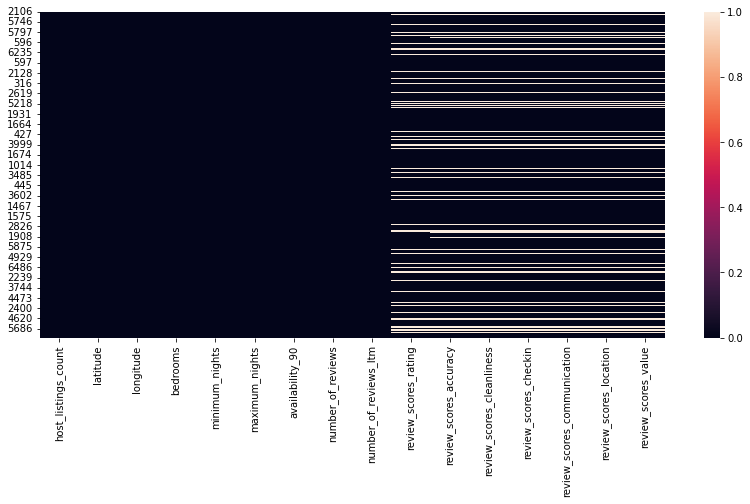

In [ ]:
plt.figure(figsize=(14,6))
sns.heatmap(df_knn.isnull());

In [ ]:
pd.set_option('display.max_columns', None)
df_knn.head()

,host_listings_count,latitude,longitude,bedrooms,minimum_nights,maximum_nights,availability_90,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
2106,1.0,41.68882,-87.60642,3.0,3,1125,78,46,14,4.83,4.96,4.74,4.91,4.93,4.78,4.93
1637,1.0,41.90458,-87.63012,1.0,1,1125,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,4.0,41.89780,-87.68158,2.0,1,1125,59,407,60,4.82,4.91,4.85,4.98,4.91,4.89,4.86
2611,9.0,41.89581,-87.65554,1.0,2,1125,72,94,20,4.88,4.97,4.87,4.97,4.97,4.95,4.90
4914,9.0,41.86851,-87.62746,1.0,2,365,62,50,50,4.88,4.92,4.90,4.74,4.82,4.84,4.82


In [ ]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5420 entries, 2106 to 5157
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_listings_count          5420 non-null   float64
 1   latitude                     5420 non-null   float64
 2   longitude                    5420 non-null   float64
 3   bedrooms                     5420 non-null   float64
 4   minimum_nights               5420 non-null   int64  
 5   maximum_nights               5420 non-null   int64  
 6   availability_90              5420 non-null   int64  
 7   number_of_reviews            5420 non-null   int64  
 8   number_of_reviews_ltm        5420 non-null   int64  
 9   review_scores_rating         4515 non-null   float64
 10  review_scores_accuracy       4494 non-null   float64
 11  review_scores_cleanliness    4494 non-null   float64
 12  review_scores_checkin        4493 non-null   float64
 13  review_scores_c

In [ ]:
get_nulls_unique(df_knn).round(4)

,Columns,Nulls,Unique
0,host_listings_count,0.0000,0.0087
1,latitude,0.0000,0.8411
2,longitude,0.0000,0.8131
3,bedrooms,0.0000,0.0037
4,minimum_nights,0.0000,0.0092
5,maximum_nights,0.0000,0.0223
6,availability_90,0.0000,0.0168
7,number_of_reviews,0.0000,0.0631
8,number_of_reviews_ltm,0.0000,0.0207
9,review_scores_rating,0.1670,0.0256


In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer

imputer = KNNImputer()
imputed_data = imputer.fit_transform(df_knn)  # impute all the missing data
df_temp = pd.DataFrame(imputed_data, index = df_knn.index)
df_temp.columns = df_knn.columns
df_knn['review_scores_rating'] = df_temp['review_scores_rating']
df_knn['review_scores_accuracy'] = df_temp['review_scores_accuracy']
df_knn['review_scores_cleanliness'] = df_temp['review_scores_cleanliness']
df_knn['review_scores_checkin'] = df_temp['review_scores_checkin']
df_knn['review_scores_communication'] = df_temp['review_scores_communication']
df_knn['review_scores_location'] = df_temp['review_scores_location']
df_knn['review_scores_value'] = df_temp['review_scores_value']

In [ ]:
get_nulls_unique(df_knn).round(4)

,Columns,Nulls,Unique
0,host_listings_count,0.0,0.0087
1,latitude,0.0,0.8411
2,longitude,0.0,0.8131
3,bedrooms,0.0,0.0037
4,minimum_nights,0.0,0.0092
5,maximum_nights,0.0,0.0223
6,availability_90,0.0,0.0168
7,number_of_reviews,0.0,0.0631
8,number_of_reviews_ltm,0.0,0.0207
9,review_scores_rating,0.0,0.0437


**3a. Performing PCA on review Columns**

**Determining the number of principal components to keep**

In [ ]:
df_features = df_knn.copy(deep=True)

incl = ["review_scores_rating", "review_scores_accuracy",
       "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location",
       "review_scores_value"] 

df_features = df_features[incl]
df_features.head()


# features =  ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
2106,4.83,4.96,4.74,4.91,4.93,4.78,4.93
1637,4.00,4.80,4.80,5.00,5.00,5.00,5.00
501,4.82,4.91,4.85,4.98,4.91,4.89,4.86
2611,4.88,4.97,4.87,4.97,4.97,4.95,4.90
4914,4.88,4.92,4.90,4.74,4.82,4.84,4.82


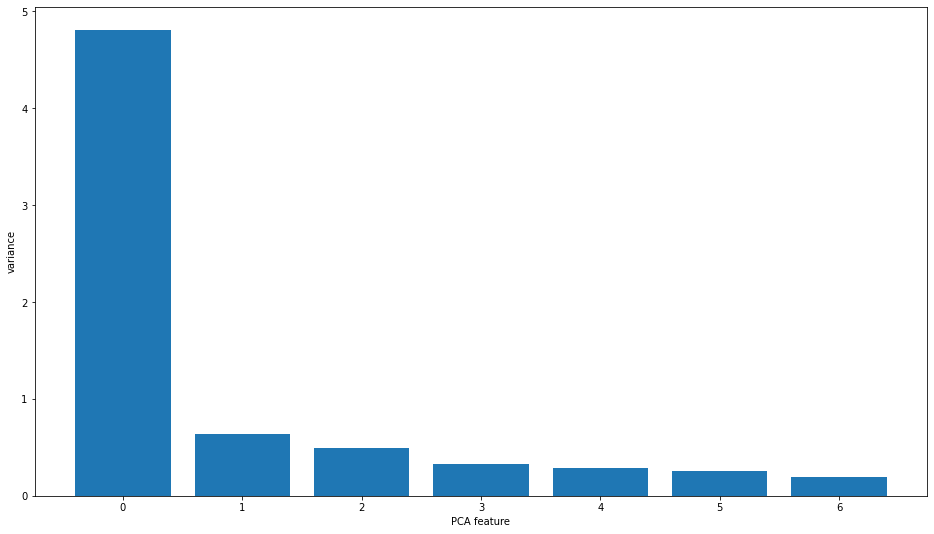

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(df_features)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

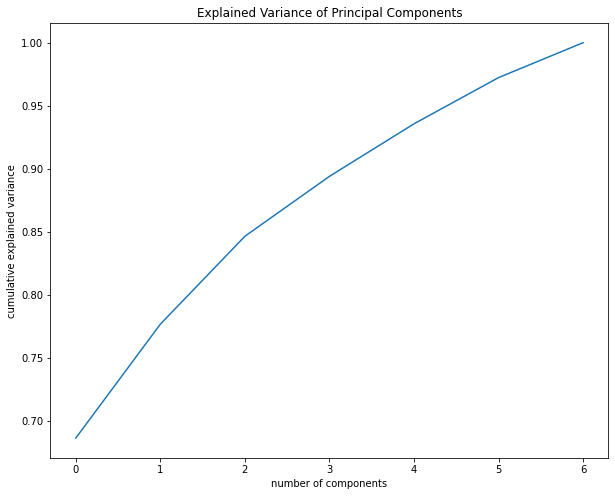

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained Variance of Principal Components")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.68633853, 0.77668958, 0.84642103, 0.89396256, 0.93563859,
       0.97229693, 1.        ])

In [ ]:
list(range(pca.n_components_))

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
features = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
            'review_scores_location', 'review_scores_value']

# Separating out the features
x = df_knn.loc[:, features].values

# Separating out the target
y = df_knn.iloc[:,0:15].values

# Standardizing the features
x = StandardScaler().fit_transform(x)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['review1', 'review2', 'review3'], index = df_train.index)

In [ ]:
df_knn_pca = pd.concat([principalDf, df_knn.iloc[:,0:15]], axis = 1) #concat to df_train

In [ ]:
principalDf.shape

(5420, 3)

In [ ]:
df_knn_pca.head(5)

,review1,review2,review3,host_listings_count,latitude,longitude,bedrooms,minimum_nights,maximum_nights,availability_90,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location
2106,-0.840477,0.138881,-0.050226,1.0,41.68882,-87.60642,3.0,3,1125,78,46,14,4.83,4.96,4.74,4.91,4.93,4.78
1637,-0.582488,-0.695504,-0.718613,1.0,41.90458,-87.63012,1.0,1,1125,0,0,0,4.00,4.80,4.80,5.00,5.00,5.00
501,-0.961085,-0.068280,-0.035977,4.0,41.89780,-87.68158,2.0,1,1125,59,407,60,4.82,4.91,4.85,4.98,4.91,4.89
2611,-1.218741,-0.147406,0.039628,9.0,41.89581,-87.65554,1.0,2,1125,72,94,20,4.88,4.97,4.87,4.97,4.97,4.95
4914,-0.628611,0.080536,0.580146,9.0,41.86851,-87.62746,1.0,2,365,62,50,50,4.88,4.92,4.90,4.74,4.82,4.84


In [ ]:
df_train_pca = pd.merge(
    left=principalDf,
    right=df_train,
    left_index=True,
    right_index=True,
)
df_train_pca = pd.merge(
    left=df_train_pca,
    right=df_side.dist,
    left_index=True,
    right_index=True,
)

In [ ]:
df_train_pca.head()

,review1,review2,review3,id,host_id,host_since,host_acceptance_rate,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms_text,bedrooms,price,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,date,host_days,response_score,property_group_0,property_group_1,property_group_2,property_group_3,property_group_4,room_type_entire_home/apt,room_type_hotel_room,room_type_private_room,room_type_shared_room,crowdedness,crowdedness_diff,crowdedness_ratio,crowdedness_adj_ratio,dishwasher,long_term_stays_allowed,paid_parking_off_premises,shower_gel,heating,patio_or_balcony,free_street_parking,fire_extinguisher,gym,private_entrance,dryer,air_conditioning,room-darkening_shades,hair_dryer,hot_water,laundromat_nearby,outdoor_furniture,oven,first_aid_kit,free_parking_on_premises,indoor_fireplace,baking_sheet,lockbox,keypad,washer,lock_on_bedroom_door,bathtub,hangers,elevator,wine_glasses,coffee_maker,tv,bbq_grill,bathrooms_privacy,bathrooms,dist
2106,-0.840477,0.138881,-0.050226,27398741,9301,2009-03-07,0.73,"Chicago, Illinois, United States",within an hour,100%,1,Pullman,1.0,1.0,t,1,"Chicago, Illinois, United States",Pullman,41.68882,-87.60642,6,1.5 baths,3.0,135.0,3,1125,1,78,46,14,4.83,4.96,4.74,4.91,4.93,4.78,4.93,0,2021-12-18,4669,1,0,1,0,0,0,1,0,0,0,1,3.0,2.0,1.0,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,1,0,1,0,1.5,0.194161
1637,-0.582488,-0.695504,-0.718613,22407641,44770878,2015-09-21,1.00,"San Francisco, California, United States",NaN,NaN,0,Gold Coast,1.0,1.0,t,1,NaN,Near North Side,41.90458,-87.63012,4,1 bath,1.0,250.0,1,1125,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-12-18,2280,0,0,0,1,0,0,1,0,0,0,1,3.0,4.0,3.0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1.0,0.022980
501,-0.961085,-0.068280,-0.035977,7810030,173968333,2018-02-18,1.00,"Chicago, Illinois, United States",NaN,NaN,1,NaN,4.0,4.0,t,1,"Chicago, Illinois, United States",West Town,41.89780,-87.68158,6,1 bath,2.0,83.0,1,1125,1,59,407,60,4.82,4.91,4.85,4.98,4.91,4.89,4.86,0,2021-12-18,1399,0,0,1,0,0,0,1,0,0,0,1,4.0,3.0,2.0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1.0,0.054579
2611,-1.218741,-0.147406,0.039628,32501823,25668821,2015-01-06,0.91,"Chicago, Illinois, United States",within an hour,100%,1,Logan Square,9.0,9.0,t,1,"Chicago, Illinois, United States",West Town,41.89581,-87.65554,4,2 shared baths,1.0,41.0,2,1125,1,72,94,20,4.88,4.97,4.87,4.97,4.97,4.95,4.90,0,2021-12-18,2538,1,0,1,0,0,0,0,0,1,0,1,3.0,4.0,3.0,1,1,0,1,0,0,1,1,0,1,0,0,1,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,0,1,1,1,0,1,2.0,0.029698
4914,-0.628611,0.080536,0.580146,48135056,375644856,2020-11-14,0.94,"Chicago, Illinois, United States",within an hour,100%,0,Chicago Loop,9.0,9.0,t,1,"Chicago, Illinois, United States",Loop,41.86851,-87.62746,6,1 bath,1.0,103.0,2,365,1,62,50,50,4.88,4.92,4.90,4.74,4.82,4.84,4.82,1,2021-12-18,399,1,0,1,0,0,0,1,0,0,0,1,5.0,6.0,5.0,1,1,1,0,1,0,1,1,0,0,1,1,1,1,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1.0,0.013251


#### Drop

In [ ]:
df_train_pca = df_train_pca.drop(['host_id', 'host_has_profile_pic', 'host_since','host_location', 'host_response_rate', 'host_response_time','host_neighbourhood', 'host_listings_count',
                          'host_total_listings_count', 'neighbourhood','neighbourhood_cleansed', 
                          'latitude','longitude', 'bathrooms_text','review_scores_rating','review_scores_accuracy',
                          'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                          'review_scores_location', 'review_scores_value', 'date'], axis = 1)

In [ ]:
df_neighbourhood = pd.read_csv('/content/drive/My Drive/Data151221/NeighbourhoodCategorized.csv', index_col=0)
neighbourhood_onehot = pd.get_dummies(df_neighbourhood.neighbourhood, prefix='neighbourhood', drop_first=True)
df_train_pca = pd.merge(
    left=df_train_pca,
    right=neighbourhood_onehot,
    left_index=True,
    right_index=True,
)

### Data Cleaning (Test)

#### Feature Selection I

In [ ]:
#selecting relevant columns 

incl = ["id","host_id", "host_since", "host_acceptance_rate", "host_location", "host_response_time", "host_response_rate", "host_is_superhost", 
        "host_neighbourhood", "host_listings_count", "host_total_listings_count", "host_has_profile_pic", "host_identity_verified",
        "neighbourhood", "neighbourhood_cleansed", "latitude", "longitude", "property_type", "room_type", "accommodates", 
        "bathrooms_text", "bedrooms", "beds", "amenities", "price", "minimum_nights", "maximum_nights", "has_availability",
       "availability_90", "number_of_reviews", "number_of_reviews_ltm", "review_scores_rating", "review_scores_accuracy",
       "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location",
       "review_scores_value", "instant_bookable"] 

df_test = df_test[incl]

#### Host-related 1-11

##### Host_since

In [ ]:
import datetime as dt
df_test['date'] = pd.to_datetime('2021-12-18')
df_test['host_since'] = pd.to_datetime(df_test['host_since'], format = "%Y-%m-%d")
df_test['host_days'] = df_test['date'] - df_test['host_since'] 
df_test['host_days'] = df_test['host_days'].astype(str)
df_test['host_days']= df_test['host_days'].str.replace('days', '')
df_test['host_days'].mode()
df_test['host_days'] = df_test['host_days'].fillna(value=1825)
df_test['host_days'].isnull().sum()

0

##### Host_response_time

In [ ]:
df_test['host_response_time'].value_counts(normalize=True)

within an hour        0.786826
within a few hours    0.129341
within a day          0.062275
a few days or more    0.021557
Name: host_response_time, dtype: float64

In [ ]:
df_test['response_score'] = df_test['host_response_time'].apply(lambda x: 1 if x in ['within an hour', 'within a few hours', 'within a day'] else 0) 

In [ ]:
df_test['response_score'].value_counts()

1    817
0    294
Name: response_score, dtype: int64

##### host_accept_rate

In [ ]:
df_test["host_acceptance_rate"].fillna('100%', inplace=True)

In [ ]:
df_test["host_acceptance_rate"] = df_test["host_acceptance_rate"].str[:-1].astype("float") / 100

In [ ]:
df_test["host_acceptance_rate"].describe()

count    1111.000000
mean        0.884455
std         0.215346
min         0.000000
25%         0.880000
50%         0.980000
75%         1.000000
max         1.000000
Name: host_acceptance_rate, dtype: float64

##### Super host 

In [ ]:
df_test['host_is_superhost'].fillna('f', inplace=True)
df_test['host_is_superhost'].loc[df_test['host_is_superhost'] == 't'] = 1
df_test['host_is_superhost'].loc[df_test['host_is_superhost'] == 'f'] = 0
df_test['host_is_superhost'] = df_test['host_is_superhost'].astype('int')

##### Host Identity

In [ ]:
df_test['host_identity_verified'].fillna('f', inplace=True)
df_test['host_identity_verified'].loc[df_test['host_identity_verified'] == 't'] = 1
df_test['host_identity_verified'].loc[df_test['host_identity_verified'] == 'f'] = 0
df_test['host_identity_verified'] = df_test['host_identity_verified'].astype('int')

##### Host Days

In [ ]:
df_test['host_days'] = df_test['host_days'].astype('int')

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 1310 to 1519
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           1111 non-null   int64         
 1   host_id                      1111 non-null   int64         
 2   host_since                   1111 non-null   datetime64[ns]
 3   host_acceptance_rate         1111 non-null   float64       
 4   host_location                1110 non-null   object        
 5   host_response_time           835 non-null    object        
 6   host_response_rate           835 non-null    object        
 7   host_is_superhost            1111 non-null   int64         
 8   host_neighbourhood           1019 non-null   object        
 9   host_listings_count          1111 non-null   float64       
 10  host_total_listings_count    1111 non-null   float64       
 11  host_has_profile_pic         1111 non-nu

#### Neighbourhood

In [ ]:
neighbourhood_col = ['neighbourhood']

In [ ]:
df_test = df_test.drop(neighbourhood_col, axis = 1)

In [ ]:
farnorth = ['Rogers Park', 'West Ridge', 'Uptown', 'Lincoln Square', 'Edison Park', 'Norwood Park', 
             'Jefferson Park', 'Forest Glen', 'North Park', 'Albany Park', 'Ohare', 'Edgewater']
north = ['North Center', 'Lake View', 'Lincoln Park', 'Avondale', 'Logan Square']
northwest = ['Portage Park', 'Irving Park', 'Dunning', 'Montclare', 'Belmont Cragin', 'Hermosa']
central = ['Near North Side', 'Loop', 'Near South Side']
west = ['Humboldt Park', 'West Town', 'Austin', 'West Garfield Park', 'East Garfield Park',
        'Near West Side', 'North Lawndale', 'South Lawndale', 'Lower West Side']
southwest = ['Garfield Ridge', 'Archer Heights', 'Brighton Park', 'Mckinley Park', 'New City', 
             'West Elsdon', 'Gage Park', 'Clearing', 'West Lawn', 'Chicago Lawn',
             'West Englewood', 'Englewood']
south = ['Armour Square', 'Douglas', 'Oakland', 'Fuller Park', 'Grand Boulevard', 'Kenwood', 'Washington Park',
         'Hyde Park', 'Woodlawn', 'South Shore', 'Bridgeport', 'Greater Grand Crossing']
farsouthwest = ['Ashburn', 'Auburn Gresham', 'Beverly', 'Washington Heights', 'Mount Greenwood', 'Morgan Park']
farsouth = ['Chatham', 'Avalon Park', 'South Chicago', 'Burnside', 'Calumet Heights', 'Roseland',
            'Pullman', 'South Deering', 'East Side', 'West Pullman', 'Riverdale', 'Hegewisch']   
section_list = ['farnorth', 'north', 'northwest', 'central', 'west', 'southwest', 'south', 'farsouthwest','farsouth']    
#Building a section dictionary
section_dict = {}
section_dict['farnorth'] = farnorth
section_dict['north'] = north
section_dict['northwest'] = northwest
section_dict['central'] = central
section_dict['west'] = west
section_dict['southwest'] = southwest
section_dict['south'] = south
section_dict['farsouthwest'] = farsouthwest
section_dict['farsouth'] = farsouth

In [ ]:
#Initialize the column 
df_test['neighbourhood'] = np.nan

#Iterate through dataframe to assign a category 
i = 0
for index, row in df_test.iterrows():
  for key, value in section_dict.items():
    if row['neighbourhood_cleansed'] in value:
      df_test.loc[index, 'neighbourhood'] = key

In [ ]:
test_neighbourhood_onehot = pd.get_dummies(df_test.neighbourhood, prefix='neighbourhood', drop_first=True)

In [ ]:
df_test = df_test.join(test_neighbourhood_onehot).drop('neighbourhood', axis = 1)

In [ ]:
df_test['dist'] = np.sqrt((loop_lat - df_test.latitude)**2 + (loop_long - df_test.longitude)**2)

#### Property Features

In [ ]:
df_test['property'] = [p[-1].lower() for p in df_test['property_type'].str.split(' in |Entire ')]
property_type = {'cabin': 'group_0',
                 'farm stay': 'group_0',
                 'casa particular': 'group_0',
                 'hostel': 'group_0',
                 'cottage': 'group_0',
                 'bungalow': 'group_0',
                 'private room': 'group_0',
                 'residential home': 'group_1',
                 'guest suite': 'group_1',
                 'tiny house': 'group_1',
                 'bed and breakfast': 'group_1',
                 'guesthouse': 'group_1',
                 'rental unit': 'group_1',
                 'townhouse': 'group_2',
                 'condominium (condo)': 'group_2',
                 'loft': 'group_2',
                 'home/apt': 'group_2',
                 'boutique hotel': 'group_2',
                 'hotel': 'group_3',
                 'serviced apartment': 'group_3',
                 'aparthotel': 'group_3',
                 'tower': 'group_4',
                 'boat': 'group_4',
                 'vacation home': 'group_4',
                 'villa': 'group_4',
                 'place': 'group_4'}
df_test['property'] = df_test['property'].map(dict(property_type))
df_test = pd.get_dummies(df_test, columns=['property'])

df_test['room_type'] = df_test['room_type'].str.lower().str.replace(' ', '_')
df_test = pd.get_dummies(df_test, columns=['room_type'])

df_test['bedrooms'] = df_test['bedrooms'].fillna(df_test['accommodates'].map(dict(ac_bdrm)))

df_test['crowdedness'] = (df_test['accommodates'] > df_test['bedrooms']).astype(int)
df_test['crowdedness_diff'] = df_test['accommodates'] - df_test['bedrooms']
df_test['crowdedness_ratio'] = df_test['accommodates'] / df_test['bedrooms']
df_test['crowdedness_adj_ratio'] = (df_test['accommodates'] - df_test['bedrooms']) / df_test['bedrooms']

for amenity in df_amenities.columns:
    df_test[amenity] = [amenity.replace('_', ' ') in lst.lower() for lst in df_test['amenities']]
    df_test[amenity] = df_test[amenity].astype(int)

df_test.drop(columns=['property_type', 'beds', 'amenities'], inplace=True)

##### Bathroom


In [ ]:
#cleaning the bathrooms variable
df_test['bathrooms_privacy'] = df_test['bathrooms_text'].str.contains('shared')
df_test['bathrooms_privacy'] = df_test['bathrooms_privacy'].fillna(value = False)
df_test['bathrooms_privacy'].loc[df_test['bathrooms_privacy'] == 'True'] = 1
df_test['bathrooms_privacy'].loc[df_test['bathrooms_privacy'] == 'False'] = 0
df_test['bathrooms_privacy'].describe()

count      1111
unique        2
top       False
freq        920
Name: bathrooms_privacy, dtype: object

In [ ]:
df_test['bathrooms_text'].unique()

array(['1.5 baths', '1 bath', '2.5 baths', '1 shared bath',
       '1 private bath', '2 baths', '3 baths', '4.5 baths', '4 baths',
       '2 shared baths', '1.5 shared baths', '3.5 baths',
       '4 shared baths', '2.5 shared baths', '3 shared baths', '5 baths',
       '11 shared baths', 'Shared half-bath', '0 shared baths', '7 baths',
       nan, 'Private half-bath', '6 baths'], dtype=object)

In [ ]:
df_test['bathrooms'] = df_test['bathrooms_text'].str.split().str.get(0)
df_test['bathrooms'] = np.where(df_test['bathrooms'] == 'Private', '0.5', df_test['bathrooms'])
df_test['bathrooms'] = np.where(df_test['bathrooms'] == 'Half-bath', '0.5', df_test['bathrooms'])
df_test['bathrooms'] = np.where(df_test['bathrooms'] == 'Shared', '0.5', df_test['bathrooms'])

In [ ]:
df_train['bathrooms'].astype('float')

2106    1.5
1637    1.0
501     1.0
2611    2.0
4914    1.0
       ... 
905     2.0
5192    1.0
3980    1.0
235     1.5
5157    3.5
Name: bathrooms, Length: 5420, dtype: float64

In [ ]:
df_test['bathrooms'].fillna(df_test['bathrooms'].mode()[0], inplace=True)
df_test['bathrooms'].isnull().sum()

0

In [ ]:
df_test['bathrooms_privacy'] = df_test['bathrooms_privacy'].map({False: 0, True: 1})
df_test['bathrooms'] = df_test['bathrooms'].astype('float')

In [ ]:
df_test['has_availability'] = df_test['has_availability'].replace({'t':1, 'f':0}).astype('int')
df_test['instant_bookable'] = df_test['instant_bookable'].replace({'t':1, 'f':0}).astype('int')

#### Review

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 1310 to 1519
Data columns (total 94 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           1111 non-null   int64         
 1   host_id                      1111 non-null   int64         
 2   host_since                   1111 non-null   datetime64[ns]
 3   host_acceptance_rate         1111 non-null   float64       
 4   host_location                1110 non-null   object        
 5   host_response_time           835 non-null    object        
 6   host_response_rate           835 non-null    object        
 7   host_is_superhost            1111 non-null   int64         
 8   host_neighbourhood           1019 non-null   object        
 9   host_listings_count          1111 non-null   float64       
 10  host_total_listings_count    1111 non-null   float64       
 11  host_has_profile_pic         1111 non-nu

In [ ]:
df_test.columns

Index(['id', 'host_id', 'host_since', 'host_acceptance_rate', 'host_location',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms_text', 'bedrooms', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_90', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'date', 'host_days',
       'response_score', 'neighbourhood_farnorth', 'neighbourhood_farsouth',
       'neighbourhood_farsouthwest', 'neighbourhood_north',
       'neighbourhood_northwest', 'neighbourhood_south',
       'n

In [ ]:
df_1 = df_test.filter(['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                         'review_scores_communication', 'review_scores_location', 'review_scores_value'])

df = df_1.copy(deep=True)

## Cleaning Up Reviews

df_clean = df_test.copy(deep=True)
entries = df_clean.shape[0]
features = df_clean.shape[1]

print('Number of entries:', entries)
print('Number of features:', features)
df_clean.groupby('bedrooms').size()
corr = df_clean.corr()
corr.style.background_gradient(cmap = "coolwarm").set_precision(2)

df_clean.info()
df_knn = df_clean.copy(deep=True)

#dropped: 'property_type', 'room_type', 'accommodates', 'beds', 'price',"host_id", "id"
incl = ["host_listings_count", "latitude", "longitude", 
       "bedrooms", "minimum_nights", "maximum_nights",
       "availability_90", "number_of_reviews", "number_of_reviews_ltm", "review_scores_rating", "review_scores_accuracy",
       "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location",
       "review_scores_value"] 

df_knn = df_test[incl]
#missing_data = df_knn.isna().sum()/len(df_test)
#x = missing_data[missing_data > 0.00].sort_values(ascending = False)
#x
#plt.figure(figsize=(14,6))
#sns.heatmap(df_knn.isnull());
#pd.set_option('display.max_columns', None)
#df_knn.head()

from sklearn.impute import KNNImputer

imputer = KNNImputer()
imputed_data = imputer.fit_transform(df_knn)  # impute all the missing data
df_temp = pd.DataFrame(imputed_data, index = df_knn.index)
df_temp.columns = df_knn.columns
df_knn['review_scores_rating'] = df_temp['review_scores_rating']
df_knn['review_scores_accuracy'] = df_temp['review_scores_accuracy']
df_knn['review_scores_cleanliness'] = df_temp['review_scores_cleanliness']
df_knn['review_scores_checkin'] = df_temp['review_scores_checkin']
df_knn['review_scores_communication'] = df_temp['review_scores_communication']
df_knn['review_scores_location'] = df_temp['review_scores_location']
df_knn['review_scores_value'] = df_temp['review_scores_value']
df_knn.info()
get_nulls_unique(df_knn).round(4)

Number of entries: 1111
Number of features: 94
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 1310 to 1519
Data columns (total 94 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           1111 non-null   int64         
 1   host_id                      1111 non-null   int64         
 2   host_since                   1111 non-null   datetime64[ns]
 3   host_acceptance_rate         1111 non-null   float64       
 4   host_location                1110 non-null   object        
 5   host_response_time           835 non-null    object        
 6   host_response_rate           835 non-null    object        
 7   host_is_superhost            1111 non-null   int64         
 8   host_neighbourhood           1019 non-null   object        
 9   host_listings_count          1111 non-null   float64       
 10  host_total_listings_count    1111 non-null   float64      

,Columns,Nulls,Unique
0,host_listings_count,0.0,0.0387
1,latitude,0.0,0.9559
2,longitude,0.0,0.9496
3,bedrooms,0.0,0.0126
4,minimum_nights,0.0,0.0306
5,maximum_nights,0.0,0.0594
6,availability_90,0.0,0.0801
7,number_of_reviews,0.0,0.1836
8,number_of_reviews_ltm,0.0,0.0720
9,review_scores_rating,0.0,0.1242


In [ ]:



df_features = df_knn.copy(deep=True)

incl = ["review_scores_rating", "review_scores_accuracy",
       "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location",
       "review_scores_value"] 

df_features = df_features[incl]
df_features.head()


features =  ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(df_features)

# Separating out the features
x = df_knn.loc[:, features].values

# Separating out the target
y = df_knn.iloc[:,0:15].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['review1', 'review2', 'review3'], index = df_test.index)
df_knn_pca = pd.concat([principalDf, df_knn.iloc[:,0:15]], axis = 1) 
principalDf.shape
principalDf
df_knn_pca.head(5)
pca.explained_variance_ratio_

df_test_pca = pd.merge(
    left=principalDf,
    right=df_test,
    left_index=True,
    right_index=True,
)


df_test_pca.head()


,review1,review2,review3,id,host_id,host_since,host_acceptance_rate,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms_text,bedrooms,price,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,date,host_days,response_score,neighbourhood_farnorth,neighbourhood_farsouth,neighbourhood_farsouthwest,neighbourhood_north,neighbourhood_northwest,neighbourhood_south,neighbourhood_southwest,neighbourhood_west,dist,property_group_0,property_group_1,property_group_2,property_group_3,property_group_4,room_type_entire_home/apt,room_type_hotel_room,room_type_private_room,room_type_shared_room,crowdedness,crowdedness_diff,crowdedness_ratio,crowdedness_adj_ratio,dishwasher,long_term_stays_allowed,paid_parking_off_premises,shower_gel,heating,patio_or_balcony,free_street_parking,fire_extinguisher,gym,private_entrance,dryer,air_conditioning,room-darkening_shades,hair_dryer,hot_water,laundromat_nearby,outdoor_furniture,oven,first_aid_kit,free_parking_on_premises,indoor_fireplace,baking_sheet,lockbox,keypad,washer,lock_on_bedroom_door,bathtub,hangers,elevator,wine_glasses,coffee_maker,tv,bbq_grill,bathrooms_privacy,bathrooms
1310,2.230380,1.219480,8.027453,19693008,129580849,2017-05-09,1.00,"Chicago, Illinois, United States",NaN,NaN,0,Loop,1.0,1.0,f,1,Loop,41.88429,-87.61462,2,1.5 baths,1.0,155.0,3,21,1,0,1,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-12-18,1684,0,0,0,0,0,0,0,0,0,0.015078,0,1,0,0,0,1,0,0,0,1,1.0,2.000000,1.000000,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1.5
2336,-1.348964,0.423323,-0.197176,29301630,96996936,2016-09-27,1.00,"Chicago, Illinois, United States",NaN,NaN,0,Wicker Park,2.0,2.0,t,1,West Town,41.91154,-87.67529,5,1 bath,2.0,135.0,2,7,1,0,9,0,5.00,5.00,4.89,5.00,5.00,5.00,4.78,0,2021-12-18,1908,0,0,0,0,0,0,0,0,1,0.054740,0,1,0,0,0,1,0,0,0,1,3.0,2.500000,1.500000,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1.0
169,-0.118339,-0.986234,-0.126858,2715815,3965428,2012-10-24,0.52,"Chicago, Illinois, United States",within an hour,96%,1,Loop,96.0,96.0,t,1,Near South Side,41.85361,-87.62434,4,1 bath,1.0,120.0,31,1125,1,90,15,0,4.80,4.87,4.87,4.73,4.87,4.53,4.73,0,2021-12-18,3342,1,0,0,0,0,0,0,0,0,0.028463,0,1,0,0,0,1,0,0,0,1,3.0,4.000000,3.000000,1,1,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,1,1,0,1.0
1494,-0.392849,0.378078,-0.101916,21254658,5468317,2013-03-14,0.99,"Los Angeles County, California, United States",within an hour,100%,0,Rogers Park,8.0,8.0,t,1,Rogers Park,42.01034,-87.66452,3,2.5 baths,1.0,50.0,1,32,1,3,58,3,4.74,4.83,4.69,4.93,4.78,4.91,4.81,1,2021-12-18,3201,1,1,0,0,0,0,0,0,0,0.133420,0,1,0,0,0,0,0,1,0,1,2.0,3.000000,2.000000,1,1,1,0,1,0,1,1,0,0,1,1,0,1,1,0,0,1,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,2.5
3618,-0.607947,0.104376,-0.298040,40225885,124143623,2017-04-03,0.94,"Chicago, Illinois, United States",within a few hours,70%,0,Logan Square,3.0,3.0,t,1,Logan Square,41.91973,-87.71484,8,1 bath,3.0,101.0,2,1125,1,77,47,27,4.87,4.94,4.55,5.00,4.91,4.87,4.77,0,2021-12-18,1720,1,0,0,0,1,0,0,0,0,0.093506,0,1,0,0,0,1,0,0,0,1,5.0,2.666667,1.666667,0,1,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0,1,1,1,0,0,1,0,1,0,0,1,0,0,1,1,1,0,1.0


In [ ]:
df_test_pca = df_test_pca.drop(['host_id', 'host_has_profile_pic', 'host_since','host_location', 'host_response_rate', 'host_response_time','host_neighbourhood', 'host_listings_count',
                          'host_total_listings_count','neighbourhood_cleansed', 
                          'latitude','longitude', 'bathrooms_text','review_scores_rating','review_scores_accuracy',
                          'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                          'review_scores_location', 'review_scores_value', 'date'], axis = 1)

In [ ]:
assert set(df_test_pca.columns) == set(df_train_pca.columns), 'columns mismatched'

In [ ]:
df_train_pca = df_train_pca[df_test_pca.columns]

### Save csv

In [ ]:
df_train_pca.to_csv(r'/content/drive/My Drive/Data151221/train.csv')

In [ ]:
pd.read_csv('/content/drive/My Drive/Data151221/train.csv', index_col=0)

,review1,review2,review3,id,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bedrooms,price,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,number_of_reviews_ltm,instant_bookable,host_days,response_score,neighbourhood_farnorth,neighbourhood_farsouth,neighbourhood_farsouthwest,neighbourhood_north,neighbourhood_northwest,neighbourhood_south,neighbourhood_southwest,neighbourhood_west,dist,property_group_0,property_group_1,property_group_2,property_group_3,property_group_4,room_type_entire_home/apt,room_type_hotel_room,room_type_private_room,room_type_shared_room,crowdedness,crowdedness_diff,crowdedness_ratio,crowdedness_adj_ratio,dishwasher,long_term_stays_allowed,paid_parking_off_premises,shower_gel,heating,patio_or_balcony,free_street_parking,fire_extinguisher,gym,private_entrance,dryer,air_conditioning,room-darkening_shades,hair_dryer,hot_water,laundromat_nearby,outdoor_furniture,oven,first_aid_kit,free_parking_on_premises,indoor_fireplace,baking_sheet,lockbox,keypad,washer,lock_on_bedroom_door,bathtub,hangers,elevator,wine_glasses,coffee_maker,tv,bbq_grill,bathrooms_privacy,bathrooms
2106,-0.840477,0.138881,-0.050226,27398741,0.73,1,1,6,3.0,135.0,3,1125,1,78,46,14,0,4669,1,0,1,0,0,0,0,0,0,0.194161,0,1,0,0,0,1,0,0,0,1,3.0,2.000000,1.000000,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,1,0,1,0,1.5
1637,-0.582488,-0.695504,-0.718613,22407641,1.00,0,1,4,1.0,250.0,1,1125,1,0,0,0,0,2280,0,0,0,0,0,0,0,0,0,0.022980,0,0,1,0,0,1,0,0,0,1,3.0,4.000000,3.000000,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1.0
501,-0.961085,-0.068280,-0.035977,7810030,1.00,1,1,6,2.0,83.0,1,1125,1,59,407,60,0,1399,0,0,0,0,0,0,0,0,1,0.054579,0,1,0,0,0,1,0,0,0,1,4.0,3.000000,2.000000,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1.0
2611,-1.218741,-0.147406,0.039628,32501823,0.91,1,1,4,1.0,41.0,2,1125,1,72,94,20,0,2538,1,0,0,0,0,0,0,0,1,0.029698,0,1,0,0,0,0,0,1,0,1,3.0,4.000000,3.000000,1,1,0,1,0,0,1,1,0,1,0,0,1,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,0,1,1,1,0,1,2.0
4914,-0.628611,0.080536,0.580146,48135056,0.94,0,1,6,1.0,103.0,2,365,1,62,50,50,1,399,1,0,0,0,0,0,0,0,0,0.013251,0,1,0,0,0,1,0,0,0,1,5.0,6.000000,5.000000,1,1,1,0,1,0,1,1,0,0,1,1,1,1,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,-0.842149,0.035976,0.174056,14611960,0.99,0,0,8,3.0,179.0,4,1125,1,77,64,11,1,1948,1,0,0,0,1,0,0,0,0,0.062185,0,1,0,0,0,1,0,0,0,1,5.0,2.666667,1.666667,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1,0,0,1,1,0,0,1,0,1,1,0,1,1,0,1,1,1,0,0,2.0
5192,0.932777,-0.744487,0.491241,49159665,0.93,0,0,2,1.0,62.0,2,1125,1,77,21,21,1,3016,1,1,0,0,0,0,0,0,0,0.103694,0,1,0,0,0,1,0,0,0,1,1.0,2.000000,1.000000,1,1,0,0,1,0,1,0,0,1,1,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1.0
3980,5.996654,-5.182590,-4.494357,42426693,0.98,0,1,2,1.0,143.0,30,1125,1,56,1,0,1,1828,1,0,0,0,0,0,0,0,0,0.006868,0,1,0,0,0,1,0,0,0,1,1.0,2.000000,1.000000,1,1,1,0,1,0,0,0,1,1,1,1,0,1,1,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,0,1.0
235,-0.897784,0.430990,0.008948,4021636,1.00,0,1,2,1.0,101.0,2,31,1,0,19,1,0,3684,0,0,0,0,0,0,0,0,0,0.022754,0,1,0,0,0,0,0,1,0,1,1.0,2.000000,1.000000,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,1.5


In [ ]:
df_test_pca.to_csv(r'/content/drive/My Drive/Data151221/test.csv')

In [ ]:
pd.read_csv('/content/drive/My Drive/Data151221/test.csv', index_col=0)

,review1,review2,review3,id,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bedrooms,price,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,number_of_reviews_ltm,instant_bookable,host_days,response_score,neighbourhood_farnorth,neighbourhood_farsouth,neighbourhood_farsouthwest,neighbourhood_north,neighbourhood_northwest,neighbourhood_south,neighbourhood_southwest,neighbourhood_west,dist,property_group_0,property_group_1,property_group_2,property_group_3,property_group_4,room_type_entire_home/apt,room_type_hotel_room,room_type_private_room,room_type_shared_room,crowdedness,crowdedness_diff,crowdedness_ratio,crowdedness_adj_ratio,dishwasher,long_term_stays_allowed,paid_parking_off_premises,shower_gel,heating,patio_or_balcony,free_street_parking,fire_extinguisher,gym,private_entrance,dryer,air_conditioning,room-darkening_shades,hair_dryer,hot_water,laundromat_nearby,outdoor_furniture,oven,first_aid_kit,free_parking_on_premises,indoor_fireplace,baking_sheet,lockbox,keypad,washer,lock_on_bedroom_door,bathtub,hangers,elevator,wine_glasses,coffee_maker,tv,bbq_grill,bathrooms_privacy,bathrooms
1310,2.230380,1.219480,8.027453,19693008,1.00,0,1,2,1.0,155.0,3,21,1,0,1,0,0,1684,0,0,0,0,0,0,0,0,0,0.015078,0,1,0,0,0,1,0,0,0,1,1.0,2.000000,1.000000,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1.5
2336,-1.348964,0.423323,-0.197176,29301630,1.00,0,1,5,2.0,135.0,2,7,1,0,9,0,0,1908,0,0,0,0,0,0,0,0,1,0.054740,0,1,0,0,0,1,0,0,0,1,3.0,2.500000,1.500000,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1.0
169,-0.118339,-0.986234,-0.126858,2715815,0.52,1,1,4,1.0,120.0,31,1125,1,90,15,0,0,3342,1,0,0,0,0,0,0,0,0,0.028463,0,1,0,0,0,1,0,0,0,1,3.0,4.000000,3.000000,1,1,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,1,1,0,1.0
1494,-0.392849,0.378078,-0.101916,21254658,0.99,0,1,3,1.0,50.0,1,32,1,3,58,3,1,3201,1,1,0,0,0,0,0,0,0,0.133420,0,1,0,0,0,0,0,1,0,1,2.0,3.000000,2.000000,1,1,1,0,1,0,1,1,0,0,1,1,0,1,1,0,0,1,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,2.5
3618,-0.607947,0.104376,-0.298040,40225885,0.94,0,1,8,3.0,101.0,2,1125,1,77,47,27,0,1720,1,0,0,0,1,0,0,0,0,0.093506,0,1,0,0,0,1,0,0,0,1,5.0,2.666667,1.666667,0,1,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0,1,1,1,0,0,1,0,1,0,0,1,0,0,1,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,-0.758603,0.396132,-0.149842,21476855,1.00,0,1,4,1.0,88.0,3,1123,1,0,27,0,1,1517,0,0,0,0,0,0,0,0,0,0.010679,0,1,0,0,0,0,0,1,0,1,3.0,4.000000,3.000000,1,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1.0
1743,-1.137529,0.536287,-0.251738,23744056,0.86,1,1,2,1.0,199.0,2,1125,1,81,26,2,0,2746,1,0,0,0,0,0,0,0,1,0.013071,0,1,0,0,0,1,0,0,0,1,1.0,2.000000,1.000000,1,1,0,0,1,0,0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1.0
4102,4.585145,1.596938,-0.591098,43148093,0.98,0,1,2,1.0,132.0,30,1125,1,14,0,0,1,1828,1,0,0,0,0,0,0,0,0,0.022463,0,1,0,0,0,1,0,0,0,1,1.0,2.000000,1.000000,1,1,0,0,1,0,0,0,0,1,1,1,0,1,1,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,0,1.0
574,-0.980552,0.483401,-0.149493,8889577,1.00,0,1,2,1.0,49.0,40,1125,1,14,64,0,0,3511,0,0,0,0,1,0,0,0,0,0.056582,0,1,0,0,0,0,0,1,0,1,1.0,2.000000,1.000000,1,1,0,0,1,0,1,1,0,1,1,1,0,1,1,0,0,1,0,1,1,0,0,0,1,1,0,1,0,0,1,1,0,1,1.5


## Model

#### Set-Up

In [ ]:
import warnings
warnings.filterwarnings('ignore')

def execute_model(model, cv_splits=10):
    
    model.fit(X_train, y_train) 
    
    preds_train = model.predict(X_train) 
    rmse_train = mean_squared_error(y_train, preds_train, squared=False) 

    preds_val = model.predict(X_val) 
    rmse_val = mean_squared_error(y_val, preds_val, squared=False)  
    
    preds_test = model.predict(X_test) 
    rmse_test = mean_squared_error(y_test, preds_test, squared=False)
    
    cv = cross_val_score(model, X_train, y_train, cv=cv_splits, scoring='neg_mean_squared_error')
    rmse_cv = (-cv.mean())**(1/2)
    
    print (f'Train RMSE: {rmse_train:.3f}')
    print (f'Validation RMSE: {rmse_val:.3f}')
    print (f'Cross Validation RMSE: {rmse_cv:.3f}')
    print (f'Test RMSE: {rmse_test:.3f}')

In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import cross_val_score

In [ ]:
train = pd.read_csv('/content/drive/My Drive/Data151221/train.csv', index_col=0)
test = pd.read_csv('/content/drive/My Drive/Data151221/test.csv', index_col=0)

In [ ]:
X = train.loc[:, ~train.columns.isin(['price', 'id'])]
y = train['price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_test = test.loc[:, ~test.columns.isin(['price', 'id'])]
y_test = test['price']

#### <u>Linear Regression</u>

##### Linear Regression

In [ ]:
LR = LinearRegression()

execute_model(LR, cv_splits=4)

Train RMSE: 149.708
Validation RMSE: 144.320
Cross Validation RMSE: 154.937
Test RMSE: 185.179


##### MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
LR.fit(X_train, y_train)
y_pred_lr = LR.predict(X_test)
train_y_pred_lr = LR.predict(X_train)

In [ ]:
TRAIN_RMSE_LR = mean_squared_error(y_train, train_y_pred_lr, squared=False)

TEST_RMSE_LR = mean_squared_error(y_test, y_pred_lr, squared=False)

R2_LR = r2_score(y_test, y_pred_lr)

MSE_CV_scores = - cross_val_score(LR, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

In [ ]:
print('Train RMSE: ' + TRAIN_RMSE_LR.astype(str) + '\n Test RMSE: ' + TEST_RMSE_LR.astype(str) + '\n CV RMSE: ' + RMSE_CV.astype(str))

Train RMSE: 149.7081336445898
 Test RMSE: 185.18060194076185
 CV RMSE: 154.78953791170505


In [ ]:
R2_LR

0.31763360184216405

#### <u>Decision Tree</u>

In [ ]:
DT = DecisionTreeRegressor(random_state=37, max_depth=4)

execute_model(DT, cv_splits=4)

Train RMSE: 126.443
Validation RMSE: 148.058
Cross Validation RMSE: 179.455
Test RMSE: 190.354


#### <u>Gradient Boost</u>

In [ ]:
GB = GradientBoostingRegressor(random_state=37, 
                               learning_rate = 0.5, 
                              n_estimators=300,
                              min_samples_split=8)

execute_model(GB, cv_splits=4)

Train RMSE: 28.427
Validation RMSE: 125.182
Cross Validation RMSE: 150.894
Test RMSE: 176.355


#### Random Forest




In [ ]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#features = list(X.columns)

In [ ]:
#X_train.shape,X_test.shape

In [ ]:
#rf = RandomForestRegressor()

In [ ]:
#n_estimators = [int(x) for x in np.linspace(start = 600, stop = 2000, num = 10)]
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
#min_samples_split = [2, 5, 10]
#min_samples_leaf = [1, 2, 4]
#max_features = ['auto', 'sqrt']

#random_grid = {'n_estimators': n_estimators,
              # 'max_features': max_features,
               #'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf
              # }

#print(random_grid)

In [ ]:
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
#rf_random.fit(X_train, y_train)

In [ ]:
#rf_random.best_params_

In [ ]:
rf = RandomForestRegressor(n_estimators = 1066, min_samples_split = 2, max_depth = 70,
                           min_samples_leaf = 2, max_features='auto')


execute_model(rf, cv_splits=4)

Train RMSE: 65.051
Validation RMSE: 118.111
Cross Validation RMSE: 128.729
Test RMSE: 157.453


#### <u>XGBoost</u>

In [ ]:
XGB = XGBRegressor(colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, 
                   max_depth=6, n_estimators=200, random_state=42, silent=True)

execute_model(XGB, cv_splits=4)

Train RMSE: 30.644
Validation RMSE: 118.960
Cross Validation RMSE: 129.907
Test RMSE: 156.044


In [ ]:
from xgboost import plot_importance

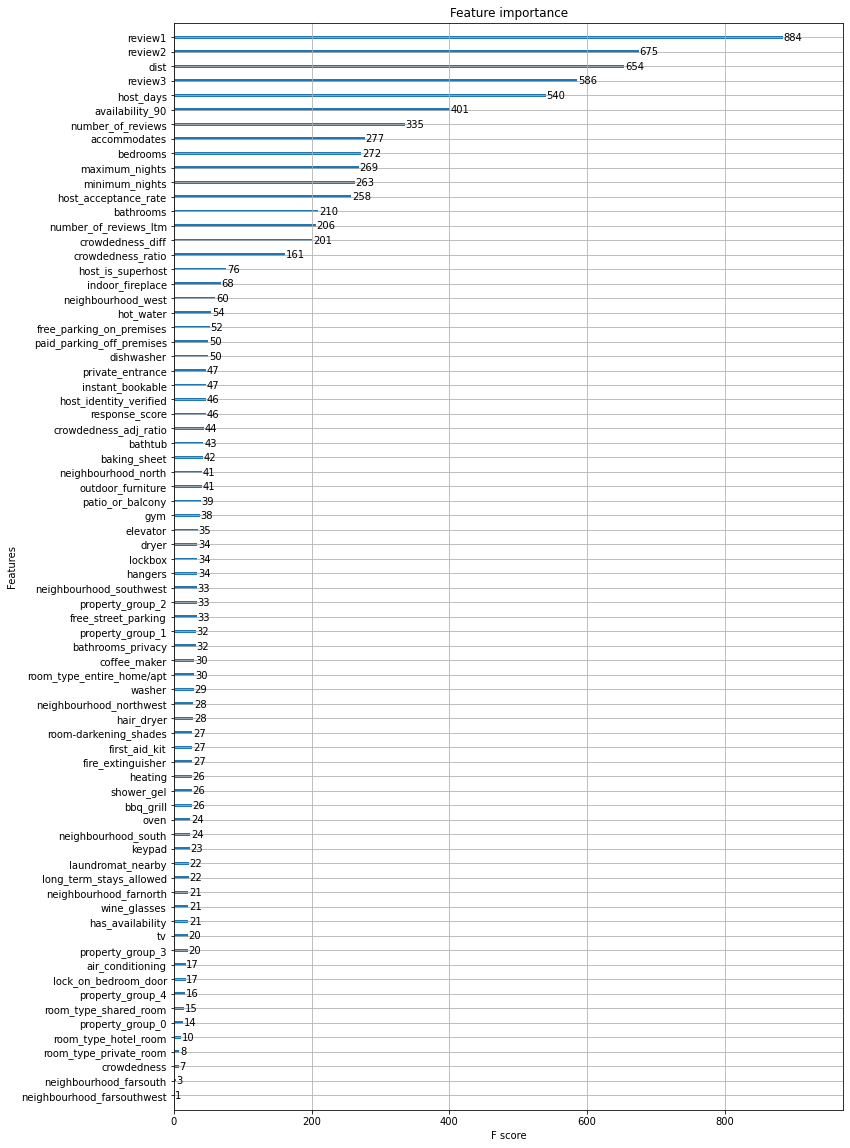

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 20))
plot_importance(XGB, ax=ax); 

#### Multi-layer Perceptron

In [ ]:
#import itertools
#import time

Warning: the following cell could take a couple of hours.

In [ ]:
# # from linear class
# result = pd.DataFrame()
# actFunc = ['identity','logistic','relu','tanh']
# nLayer = range(1,11,1)
# nHiddenNeuron = range(5,71,5)

# combList = itertools.product(actFunc, nLayer, nHiddenNeuron)

# for comb in combList:
     
#     print(f'neural network running with {comb[0]} function; layer = {comb[1]} neuron = {comb[2]}')
     
#     time_begin = time.time()
#     actFunc = comb[0]
#     nLayer = comb[1]
#     nHiddenNeuron = comb[2]
    
#     nnObj = MLPRegressor(hidden_layer_sizes = (nHiddenNeuron,)*nLayer,
#                          activation = actFunc, verbose = False,
#                          max_iter = 100000, random_state = 42)
#     thisFit = nnObj.fit(X_train, y_train)
#     y_pred = nnObj.predict(X_test)
    
#     # Simple Residual
#     y_simple_residual = y_test - y_pred
    
#     # Mean Absolute Proportion Error
#     ape = np.abs(y_simple_residual) / y_test
#     mape = np.mean(ape)
    
#     # Root Mean Squared Error
#     mse = np.mean(np.power(y_simple_residual, 2))
#     rmse = np.sqrt(mse)
    
#     # Relative Error
#     relerr = mse / np.var(y_test, ddof = 0)
    
#     # Pearson Correlation
#     corr_matrix = np.corrcoef(y_test, y_pred)
#     r2 = corr_matrix[0,1] ** 2
    
#     elapsed_time = time.time() - time_begin
#     result = result.append([[actFunc, nLayer, nHiddenNeuron, rmse, mape, relerr, r2, elapsed_time, y_pred]], ignore_index = True)
    
#     print(f'total time elapsed: {result.iloc[:, -2].sum()}')

# result.columns = ['Activation Function', 'nLayer', 'nHiddenNeuron', 'RMSE', 'MAPE', 'Relative Error', 'R Squared', 'Elapsed Time', 'Prediction']

# result.to_pickle("result.pkl")

# # Review the RMSE by each algorithm parameter
# fig, ax = plt.subplots(dpi = 200, figsize = (10,4))
# result.boxplot(column = 'RMSE', by = 'Activation Function', ax = ax)
# ax.set_xlabel('Activation Function')
# ax.set_ylabel('Root Mean Squared Error')
# plt.suptitle('')
# plt.title('')
# plt.show()

# fig, ax = plt.subplots(dpi = 200, figsize = (10,4))
# result.boxplot(column = 'RMSE', by = 'nLayer', ax = ax)
# ax.set_xlabel('Number of Layers')
# ax.set_ylabel('Root Mean Squared Error')
# plt.suptitle('')
# plt.title('')
# plt.show()

# fig, ax = plt.subplots(dpi = 200, figsize = (10,4))
# result.boxplot(column = 'RMSE', by = 'nHiddenNeuron', ax = ax)
# ax.set_xlabel('Number of Hidden Neurons per Layer')
# ax.set_ylabel('Root Mean Squared Error')
# plt.suptitle('')
# plt.title('')
# plt.show()

# # Review the Elapsed Time by each algorithm parameter
# fig, ax = plt.subplots(dpi = 200, figsize = (10,4))
# ax.hist(result['Elapsed Time'], bins = np.arange(0.0, 300.0, 10), density = True, color = 'dodgerblue')
# ax.set_xlabel('Elapsed Time (second)')
# plt.show()

# # Locate the optimal architecture
# optima_index = result['RMSE'].idxmin()
# optima_row = result.iloc[optima_index]
# actFunc = optima_row['Activation Function']
# nLayer = optima_row['nLayer']
# nHiddenNeuron = optima_row['nHiddenNeuron']


In [ ]:
nnObj = MLPRegressor(hidden_layer_sizes = (23,)*3,
                      activation = 'relu', verbose = False,
                      max_iter = 100000, random_state = 42)

execute_model(nnObj, cv_splits=4)

Train RMSE: 124.203
Validation RMSE: 124.759
Cross Validation RMSE: 146.330
Test RMSE: 165.005


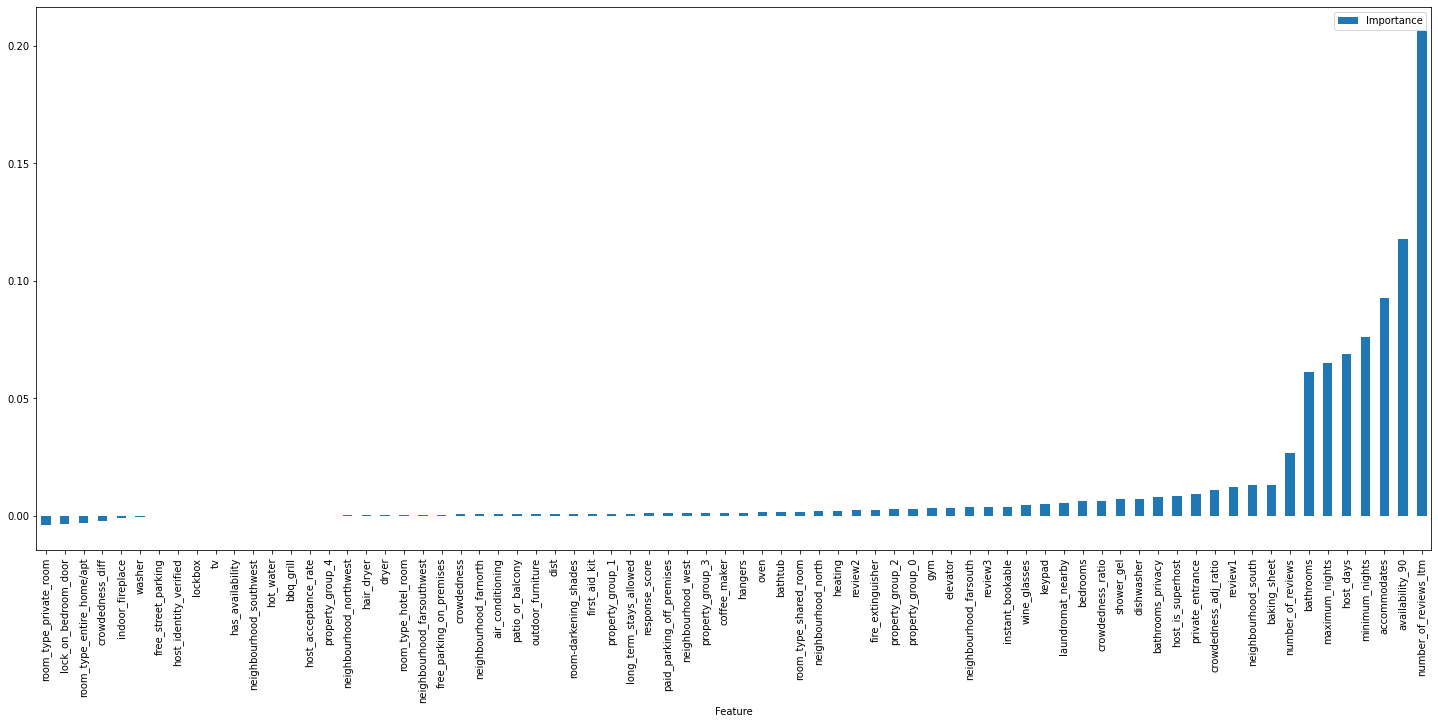

In [ ]:
 from sklearn.inspection import permutation_importance
 r = permutation_importance(nnObj, X_train, y_train, random_state=0)
 FI = pd.DataFrame({'Feature': X_val.columns, 'Importance':r.importances_mean}).sort_values('Importance')
 FI.plot(x='Feature', y='Importance', kind='bar', figsize=(25,10));

In [ ]:
 #len(list(FI[FI.Importance<0.001].Feature))

#### Ensemble

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
m1 = RandomForestRegressor(n_estimators = 1066, min_samples_split = 2, max_depth = 70,
                           min_samples_leaf = 2, max_features='auto')
m2 = XGBRegressor(colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, 
                   max_depth=6, n_estimators=200, random_state=42, silent=True)

voting = VotingRegressor([('rf', m1), ('xgboost', m2)])

In [ ]:
execute_model(voting, cv_splits=4)

Train RMSE: 43.158
Validation RMSE: 116.549
Cross Validation RMSE: 127.764
Test RMSE: 155.297


In [ ]:
m1 = RandomForestRegressor(n_estimators = 1066, min_samples_split = 2, max_depth = 70,
                           min_samples_leaf = 2, max_features='auto')
m2 = XGBRegressor(colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, 
                   max_depth=6, n_estimators=200, random_state=42, silent=True)
m3 = MLPRegressor(hidden_layer_sizes = (23,)*3,
                  activation = 'relu', verbose = False,
                  max_iter = 100000, random_state = 42)

voting = VotingRegressor([('rf', m1), ('xgboost', m2), ('mlp', m3)])

In [ ]:
execute_model(voting, cv_splits=4)

Train RMSE: 66.098
Validation RMSE: 113.081
Cross Validation RMSE: 127.390
Test RMSE: 153.327


In [ ]:
m1 = XGBRegressor(colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, 
                   max_depth=6, n_estimators=200, random_state=42, silent=True)
m2 = MLPRegressor(hidden_layer_sizes = (23,)*3,
                  activation = 'relu', verbose = False,
                  max_iter = 100000, random_state = 42)

voting = VotingRegressor([('xgboost', m1), ('mlp', m2)])

In [ ]:
execute_model(voting, cv_splits=4)

Train RMSE: 72.166
Validation RMSE: 114.285
Cross Validation RMSE: 129.864
Test RMSE: 154.550


In [ ]:
m1 = RandomForestRegressor(n_estimators = 1066, min_samples_split = 2, max_depth = 70,
                           min_samples_leaf = 2, max_features='auto')
m2 = MLPRegressor(hidden_layer_sizes = (23,)*3,
                  activation = 'relu', verbose = False,
                  max_iter = 100000, random_state = 42)

voting = VotingRegressor([('rf', m1), ('mlp', m2)])

In [ ]:
execute_model(voting, cv_splits=4)

Train RMSE: 88.857
Validation RMSE: 114.440
Cross Validation RMSE: 130.722
Test RMSE: 155.225


### Final Prediction

We chose XGBRegressor as our final model to predict the price becaue it had the lowest test RMSE score and it ran faster than the Random Forest.

In [ ]:
XGB = XGBRegressor(colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, 
                   max_depth=6, n_estimators=200, random_state=42, silent=True)

In [ ]:
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)

In [ ]:
predictions = pd.DataFrame({'price': y_pred}, index=y_test.index)

In [ ]:
predictions.to_csv(r'/content/drive/My Drive/Data151221/predictions.csv', index=False)

In [ ]:
pd.read_csv(r'/content/drive/My Drive/Data151221/predictions.csv')

,price
0,155.615680
1,157.485350
2,150.633440
3,91.514435
4,155.506000
...,...
1106,153.563750
1107,150.560210
1108,138.160450
1109,83.945770


### Business Value

In [ ]:
d = {'listing_price': y_test, 'predicted_price': y_pred_lr, 
     'number_of_reviews': X_test.number_of_reviews, 'host_experience':X_test.host_days}

In [ ]:
trail = pd.DataFrame(d)

In [ ]:
trail[(trail['host_experience'] <= 600)].shape

In [ ]:
trail_revenue = trail.loc[(trail['host_experience'] <= 600), 'predicted_price'] - trail.loc[(trail['host_experience'] <= 600), 'listing_price']

In [ ]:
trail_revenue.sum()